CAPSTONE 3 - EFFECTS OF SUBWAY & PARK PROXIMITY TO LOS ANGELES REAL ESTATE 
PREPROCESSING & MODELING

We have joined our three datasets and looked at correlation heatmaps, 

By leaving out features like square footage, bedrooms, and bathrooms, we can focus solely on how subway proximity and park proximity influence property values. This will allow us to isolate their impact without interference from other more dominant features like property size or number of rooms.

Next Steps for Predictive Modeling:
Feature Selection: We will use only the subway_proximity and park_proximity columns as the input features.
Target Variable: We'll predict Roll_totLandImp (total property value).
Model Choice: We'll start with a Random Forest Regressor to capture non-linear relationships, since this model handles interactions between variables well.
Model Evaluation: After training, we will check feature importance and use SHAP or Partial Dependence Plots to visualize how proximity to subways and parks affects property values.

In [25]:
# Serialize the current dataset with proximity data
df_property_latest_filtered.to_pickle('property_with_proximity_numbers_serialized.pkl')
print("Dataset serialized successfully.")

Dataset serialized successfully.


In [27]:
# Remove the square footage and bedrooms/bathrooms columns
df_property_model = df_property_latest_filtered.drop(columns=['SQFTmain', 'Bedrooms', 'Bathrooms'])

# Verify that the columns were removed
print(df_property_model.columns)

# Next step: Proceed with the predictive model based on proximity to subways and parks


Index(['RollYear', 'Roll_LandValue', 'Roll_totLandImp', 'CENTER_LAT',
       'CENTER_LON', 'SitusZIP', 'SitusCity', 'UseType', 'UseCode',
       'distance_to_subway', 'distance_to_park', 'park_proximity',
       'subway_proximity'],
      dtype='object')


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score# Filter properties within 5 miles of the nearest subway station

distance_threshold = 5  # Adjust as needed
df_filtered = df_property_latest_filtered[df_property_latest_filtered['distance_to_subway'] <= distance_threshold]

# Check the filtered dataset
print(df_filtered[['distance_to_subway', 'Roll_totLandImp']].head())

# Proceed with re-running the model with the filtered dataset
X_filtered = df_filtered[['subway_proximity', 'park_proximity']]
y_filtered = df_filtered['Roll_totLandImp']

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
rf_filtered = RandomForestRegressor(random_state=42)
rf_filtered.fit(X_train, y_train)

# Make predictions
y_pred_filtered = rf_filtered.predict(X_test)

# Evaluate the model
mae_filtered = mean_absolute_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

print(f"Mean Absolute Error (MAE): {mae_filtered}")
print(f"R-squared: {r2_filtered}")


         distance_to_subway Roll_totLandImp
2041788            4.995215          210872
2041806            4.987834          269521
2042004            4.984981         5605920
2042022            4.931752            3105
2042040            4.896213         1097525
Mean Absolute Error (MAE): 899730.220149249
R-squared: 0.001485943834113268


In [35]:
# Drop rows with NaN in CENTER_LAT or CENTER_LON
df_property_latest_filtered = df_property_latest_filtered.dropna(subset=['CENTER_LAT', 'CENTER_LON'])

# Geospatial clustering (KMeans based on latitude and longitude)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
df_property_latest_filtered['geo_cluster'] = kmeans.fit_predict(df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON']])

# Check the updated dataframe
print(df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON', 'geo_cluster']].head())


    CENTER_LAT  CENTER_LON  geo_cluster
17   34.220225 -118.620681            4
35   34.220044 -118.620681            4
53   34.219862 -118.620688            4
71   34.220339 -118.622718            4
89   34.220327 -118.623062            4


In [37]:
# Check for missing values in latitude and longitude columns
missing_lat = df_property_latest_filtered['CENTER_LAT'].isna().sum()
missing_lon = df_property_latest_filtered['CENTER_LON'].isna().sum()

print(f"Missing values in CENTER_LAT: {missing_lat}")
print(f"Missing values in CENTER_LON: {missing_lon}")


Missing values in CENTER_LAT: 0
Missing values in CENTER_LON: 0


In [41]:
import pandas as pd
from sklearn.cluster import KMeans

# Check for missing values in latitude and longitude columns
missing_lat = df_property_latest_filtered['CENTER_LAT'].isna().sum()
missing_lon = df_property_latest_filtered['CENTER_LON'].isna().sum()

print(f"Missing values in CENTER_LAT: {missing_lat}")
print(f"Missing values in CENTER_LON: {missing_lon}")

# Drop rows with NaN in CENTER_LAT or CENTER_LON
df_property_latest_filtered = df_property_latest_filtered.dropna(subset=['CENTER_LAT', 'CENTER_LON'])

# Geospatial clustering (KMeans based on latitude and longitude)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
df_property_latest_filtered['geo_cluster'] = kmeans.fit_predict(df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON']])

# Check the updated dataframe with clusters
print(df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON', 'geo_cluster']].head())

# Save the dataset with clusters to a new file
df_property_latest_filtered.to_pickle('property_with_geo_clusters.pkl')


Missing values in CENTER_LAT: 2281971
Missing values in CENTER_LON: 2281971


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_2089/2022424852.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_latest_filtered['geo_cluster'] = kmeans.fit_predict(df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON']])


    CENTER_LAT  CENTER_LON  geo_cluster
17   34.220225 -118.620681            4
35   34.220044 -118.620681            4
53   34.219862 -118.620688            4
71   34.220339 -118.622718            4
89   34.220327 -118.623062            4


In [43]:
# Drop rows where CENTER_LAT or CENTER_LON is NaN
df_geo = df_property_latest_filtered.dropna(subset=['CENTER_LAT', 'CENTER_LON'])

# Perform KMeans clustering (you can adjust the number of clusters as needed)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
df_geo['geo_cluster'] = kmeans.fit_predict(df_geo[['CENTER_LAT', 'CENTER_LON']])

# Check the first few rows of the dataframe with clusters
print(df_geo[['CENTER_LAT', 'CENTER_LON', 'geo_cluster']].head())

# Save the filtered and clustered dataset for future use
df_geo.to_pickle('property_with_geo_clusters.pkl')


    CENTER_LAT  CENTER_LON  geo_cluster
17   34.220225 -118.620681            4
35   34.220044 -118.620681            4
53   34.219862 -118.620688            4
71   34.220339 -118.622718            4
89   34.220327 -118.623062            4


In [51]:
# You can experiment by adding features like 'Roll_LandValue', 'UseType', 'UseCode' to the model
X = df_sample[['distance_to_park', 'distance_to_subway', 'geo_cluster', 'park_proximity', 'subway_proximity', 'Roll_LandValue', 'UseType']]

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate the Random Forest model again (use the previous code)


In [55]:
import numpy as np

# Ensure that the columns are numeric (coerce will convert invalid parsing to NaN)
df_sample['Roll_totLandImp'] = pd.to_numeric(df_sample['Roll_totLandImp'], errors='coerce')
df_sample['distance_to_subway'] = pd.to_numeric(df_sample['distance_to_subway'], errors='coerce')
df_sample['distance_to_park'] = pd.to_numeric(df_sample['distance_to_park'], errors='coerce')

# Apply log transformation to both the target variable and selected features
df_sample['Log_Property_Value'] = np.log1p(df_sample['Roll_totLandImp'])
df_sample['Log_Distance_To_Subway'] = np.log1p(df_sample['distance_to_subway'])
df_sample['Log_Distance_To_Park'] = np.log1p(df_sample['distance_to_park'])

# Display the first few rows to verify
print(df_sample[['Log_Property_Value', 'Log_Distance_To_Subway', 'Log_Distance_To_Park']].head())



          Log_Property_Value  Log_Distance_To_Subway  Log_Distance_To_Park
42316189           12.109567                2.390828              0.240492
31229045           12.786155                1.264464              0.140264
38982198           12.097674                2.657298              0.462634
32312710           12.971671                0.973824              0.120846
31238370           12.301692                1.427825              0.500468


Mean Absolute Error (MAE): 1.2376909686824693
R-squared: 0.0268060175110445


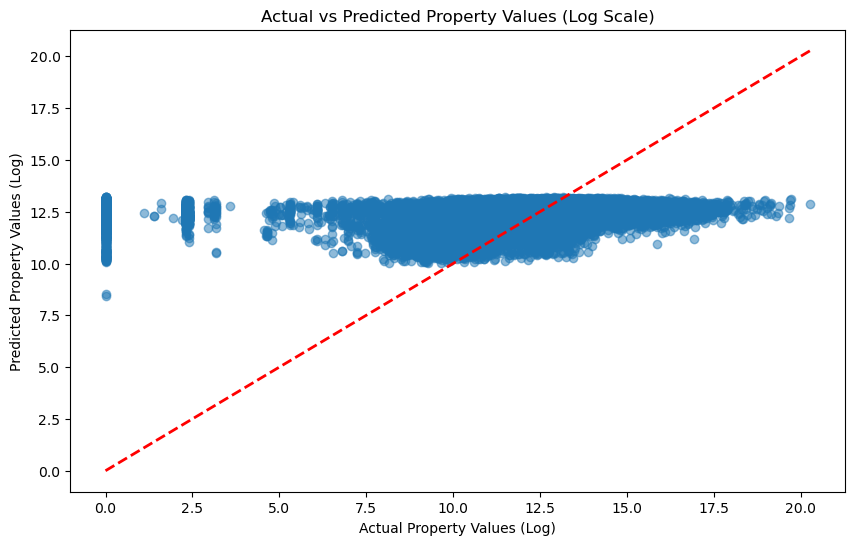

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Define features and target
X = df_sample[['Log_Distance_To_Subway', 'Log_Distance_To_Park']]
y = df_sample['Log_Property_Value']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Optional: Plot the predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Property Values (Log)')
plt.ylabel('Predicted Property Values (Log)')
plt.title('Actual vs Predicted Property Values (Log Scale)')
plt.show()


MODEL NOT CAPTURING VARIANCE - LETS TRY FILTERING WITHIN 5 MILES OF SUBWAY

In [61]:
# Filter properties within 5 miles of a subway
df_filtered_near_subway = df_property_latest_filtered[df_property_latest_filtered['distance_to_subway'] <= 5]

# Ensure that 'Roll_totLandImp', 'distance_to_subway', and 'distance_to_park' are numeric
df_filtered_near_subway['Roll_totLandImp'] = pd.to_numeric(df_filtered_near_subway['Roll_totLandImp'], errors='coerce')
df_filtered_near_subway['distance_to_subway'] = pd.to_numeric(df_filtered_near_subway['distance_to_subway'], errors='coerce')
df_filtered_near_subway['distance_to_park'] = pd.to_numeric(df_filtered_near_subway['distance_to_park'], errors='coerce')

# Drop any rows with missing values after conversion
df_filtered_near_subway = df_filtered_near_subway.dropna(subset=['Roll_totLandImp', 'distance_to_subway', 'distance_to_park'])

# Log-transform the property value and distances
df_filtered_near_subway['Log_Property_Value'] = np.log1p(df_filtered_near_subway['Roll_totLandImp'])
df_filtered_near_subway['Log_Distance_To_Subway'] = np.log1p(df_filtered_near_subway['distance_to_subway'])
df_filtered_near_subway['Log_Distance_To_Park'] = np.log1p(df_filtered_near_subway['distance_to_park'])

# Check the first few rows of the filtered dataset
print(df_filtered_near_subway[['Log_Property_Value', 'Log_Distance_To_Subway', 'Log_Distance_To_Park']].head())


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_2089/817542226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_near_subway['Roll_totLandImp'] = pd.to_numeric(df_filtered_near_subway['Roll_totLandImp'], errors='coerce')
/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_2089/817542226.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_near_subway['distance_to_subway'] = pd.to_numeric(df_filtered_near_subway['distance_to_subway'], errors='coerce')
/var/folders/0

         Log_Property_Value  Log_Distance_To_Subway  Log_Distance_To_Park
2041788           12.259011                1.790962              0.677243
2041806           12.504405                1.789730              0.681969
2042004           15.539334                1.789253              0.668367
2042022            8.041091                1.780320              0.684210
2042040           13.908569                1.774310              0.670267


Mean Absolute Error (MAE): 1.146848133364811
R-squared: 0.0018081610506760493


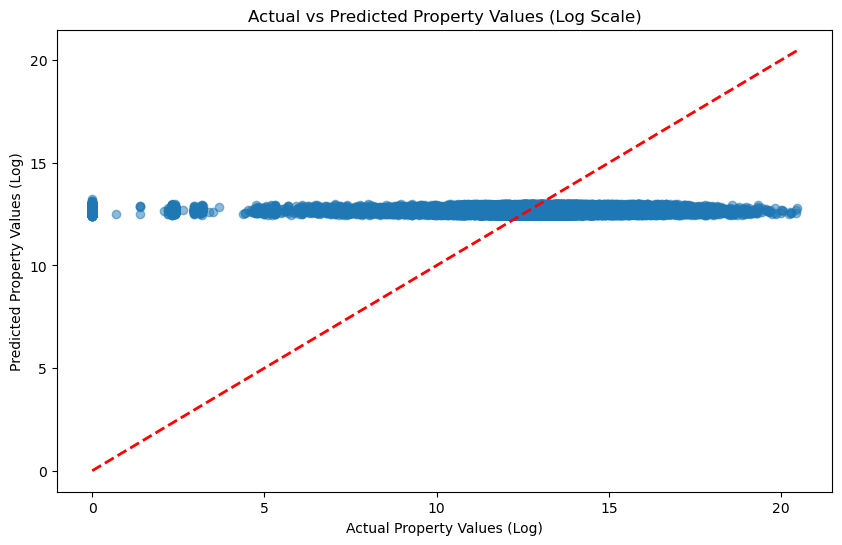

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the features and target variable
X = df_filtered_near_subway[['Log_Distance_To_Subway', 'Log_Distance_To_Park']]
y = df_filtered_near_subway['Log_Property_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Plot actual vs. predicted property values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Property Values (Log)')
plt.ylabel('Predicted Property Values (Log)')
plt.title('Actual vs Predicted Property Values (Log Scale)')
plt.show()


The scatter plot indicates that the model isn't capturing the variability in property values very well, as the predictions seem to be clustered in a narrow range (around 10-15) and aren't following the actual values very closely. This could be a sign that the linear model might not be sufficient, and the features we're using (log-transformed distances) may not be capturing the complexity of the relationship between subway and park proximity and property values.

Next Steps: Improving the Model

Mean Absolute Error (MAE): 1.234880335754326
R-squared: -0.03336715438844284


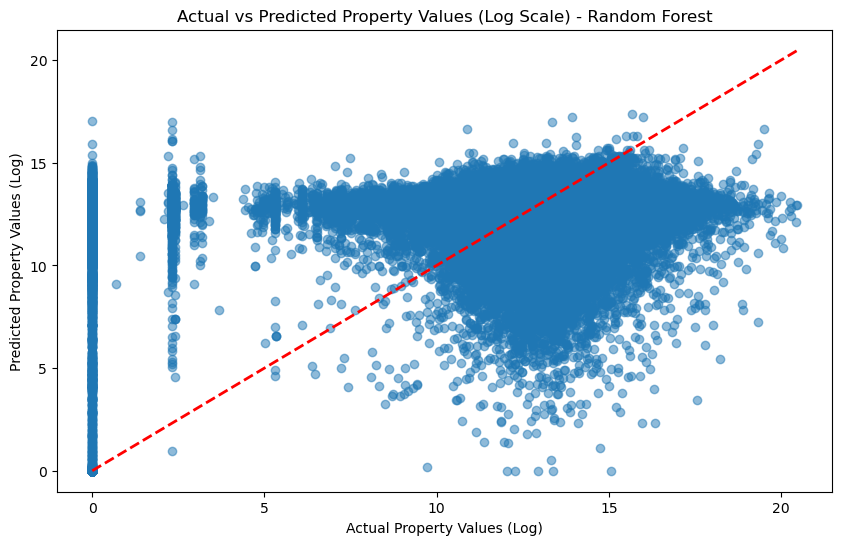

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define features and target variable
X = df_filtered_near_subway[['Log_Distance_To_Subway', 'Log_Distance_To_Park']]
y = df_filtered_near_subway['Log_Property_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Display metrics
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared: {r2_rf}")

# Plot actual vs predicted property values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Property Values (Log)')
plt.ylabel('Predicted Property Values (Log)')
plt.title('Actual vs Predicted Property Values (Log Scale) - Random Forest')
plt.show()


The Random Forest model seems to be improving the fit but is still showing a few areas where the predictions are not as accurate as they could be. There's a clear cluster around higher actual values where the model under-predicts, as seen in the scatterplot.

Here’s what the results indicate:

Mean Absolute Error (MAE) is still relatively high, which means that the model is struggling with some degree of variability in the data.
R-squared is positive, indicating that the model does capture some relationship between the features and the target variable, but there's still room for improvement.
Next Steps:
Tune Hyperparameters:

We can tune the hyperparameters of the Random Forest model (e.g., number of trees, depth of trees) to potentially improve the performance.
Consider Feature Engineering:

We could add interaction terms or polynomial features to capture non-linear relationships between proximity to subways/parks and property values.

FIRST LET'S TRY EXTRA TREES REGRESSOR - IT'S WORKED WELL IN THE PAST

Mean Absolute Error (MAE): 1.2906419710425523
R-squared: -0.11216018761674773


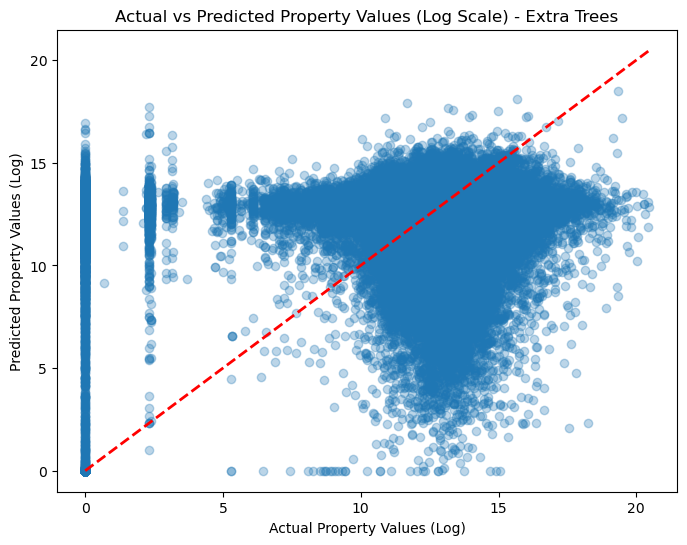

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize Extra Trees Regressor
extra_trees_model = ExtraTreesRegressor(n_estimators=200, random_state=42)

# Fit the model on the training data
extra_trees_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Calculate metrics
mae_extra_trees = mean_absolute_error(y_test, y_pred_extra_trees)
r2_extra_trees = r2_score(y_test, y_pred_extra_trees)

print(f"Mean Absolute Error (MAE): {mae_extra_trees}")
print(f"R-squared: {r2_extra_trees}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_extra_trees, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Property Values (Log Scale) - Extra Trees')
plt.xlabel('Actual Property Values (Log)')
plt.ylabel('Predicted Property Values (Log)')
plt.show()


Partial Dependence Plots (PDP) and SHAP (SHapley Additive exPlanations) are incredibly useful for interpreting complex models like Random Forests and Extra Trees. Performing these analyses would help in multiple ways:

1. Partial Dependence Plots (PDP):
Why Use PDP? PDPs show how the predicted outcome changes as a feature value is varied, while keeping other features constant. This is especially useful for understanding the marginal impact of features like subway and park proximity on property values.
What You Gain? By running PDPs, you can visually inspect how proximity to subways and parks affects property values. This can provide a clearer picture of whether these features have a positive or negative impact and how consistent that impact is across different ranges of the feature values.
2. SHAP Values:
Why Use SHAP? SHAP values give a more nuanced, local interpretation of your model's predictions. They break down how each feature contributes to an individual prediction, which is particularly useful in explaining why the model predicted a certain property value.
What You Gain? SHAP values help you understand how much proximity to subways and parks is contributing to the property value predictions for specific instances. Additionally, you get a global view of which features are most important for the model's overall predictions.
Here's What You Can Do:
Partial Dependence Plot to analyze the marginal effect of park and subway proximity on property values.
SHAP Summary Plot for deeper insights into which features (including proximity) are most impactful across the dataset.

PARTIAL DEPENDANCE PLOT (PDP) 

In [85]:
import pandas as pd

# Load a small sample of the DataFrame with only the specified columns
file_path = 'Assessor_Parcel_Data_2006_Present.csv'
df_property_sample = pd.read_csv(
    file_path,
    encoding='ISO-8859-1',
    sep='\t',
    on_bad_lines='skip',
    dtype=str,
    usecols=['Roll_totLandImp', 'Roll_TotalValue'],
    nrows=5  # Read only the first 5 rows
)

# Display the sample DataFrame
print(df_property_sample)

# Check if the two columns are the same
if 'Roll_totLandImp' in df_property_sample.columns and 'Roll_TotalValue' in df_property_sample.columns:
    are_columns_equal = (df_property_sample['Roll_totLandImp'] == df_property_sample['Roll_TotalValue']).all()
    print("The columns are equal:", are_columns_equal)
else:
    print("One or both columns are not present in the sample.")

  Roll_totLandImp Roll_TotalValue
0          756000          756000
1          771120          771120
2          700200          700200
3          478600          478600
4          478600          478600
The columns are equal: True


In [99]:
# Load the dataset with the correct separator
df_sample = pd.read_csv(file_path, sep='\t', nrows=10, encoding='ISO-8859-1', on_bad_lines='skip')

# Display the column names again
print(df_sample.columns)


Index(['SitusZIP', 'TaxRateArea_CITY', 'AIN', 'RollYear', 'TaxRateArea',
       'AssessorID', 'PropertyLocation', 'UseType', 'UseCode',
       'UseCodeDescChar1', 'UseCodeDescChar2', 'UseCodeDescChar3',
       'UseCodeDescChar4', 'totBuildingDataLines', 'YearBuilt',
       'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms', 'Units',
       'RecordingDate', 'Roll_LandValue', 'Roll_LandBaseYear', 'Roll_ImpValue',
       'Roll_ImpBaseYear', 'Roll_totLandImp', 'Roll_HomeOwnersExemp',
       'Roll_RealEstateExemp', 'Roll_FixtureValue', 'Roll_FixtureExemp',
       'Roll_PersPropValue', 'Roll_PersPropExemp', 'isTaxableParcel',
       'Roll_TotalValue', 'Roll_TotalExemption', 'netTaxableValue',
       'ParcelClassification', 'AdminRegion', 'Cluster',
       'ParcelBoundaryDescription', 'SitusHouseNo', 'SitusFraction',
       'SitusDirection', 'SitusStreet', 'SitusUnit', 'SitusCity', 'SitusZIP5',
       'rowID', 'CENTER_LAT', 'CENTER_LON'],
      dtype='object')


In [103]:
# Specify data types for certain columns to avoid mixed type warnings
dtype_spec = {
    'RollYear': 'int64',  # Ensure RollYear is treated as integers
    'CENTER_LAT': 'float64',  # Ensure CENTER_LAT is treated as floats
    'CENTER_LON': 'float64',  # Ensure CENTER_LON is treated as floats
    'UseCode': 'str',  # Treat UseCode as strings
    'SitusZIP5': 'str',  # Treat ZIP code as strings
    # Add other columns with mixed types as necessary
}

# Load the dataset in chunks with the specified dtypes
chunk_size = 50000
file_path = 'Assessor_Parcel_Data_2006_Present.csv'

df_chunks = pd.DataFrame()

chunks = pd.read_csv(file_path, sep='\t', chunksize=chunk_size, encoding='ISO-8859-1', on_bad_lines='skip', dtype=dtype_spec, low_memory=False)

for chunk in chunks:
    # Filter for the year 2023
    chunk_filtered = chunk[chunk['RollYear'] == 2023]
    df_chunks = pd.concat([df_chunks, chunk_filtered], ignore_index=True)

# Check the filtered data
print(df_chunks.head())

# Serialize the filtered data for future use
df_chunks.to_pickle('filtered_data_2023.pkl')


     SitusZIP TaxRateArea_CITY         AIN  RollYear  TaxRateArea  \
0  91304-3327      LOS ANGELES  2004001003      2023           16   
1  91304-3327      LOS ANGELES  2004001004      2023           16   
2  91304-3327      LOS ANGELES  2004001005      2023           16   
3  91304-3332      LOS ANGELES  2004001008      2023           16   
4  91304-3332      LOS ANGELES  2004001009      2023           16   

     AssessorID                         PropertyLocation UseType UseCode  \
0  2004-001-003    8321 FAUST AVE  LOS ANGELES CA  91304     SFR    0101   
1  2004-001-004    8313 FAUST AVE  LOS ANGELES CA  91304     SFR    0101   
2  2004-001-005    8309 FAUST AVE  LOS ANGELES CA  91304     SFR    0100   
3  2004-001-008  8325 MAYNARD AVE  LOS ANGELES CA  91304     SFR    0101   
4  2004-001-009  8311 MAYNARD AVE  LOS ANGELES CA  91304     SFR    0101   

  UseCodeDescChar1  ... SitusHouseNo SitusFraction SitusDirection  \
0      Residential  ...         8321                       

LETS SMOOTH DATA WITH ZIP CODE GROUPINGS
Grouping houses by ZIP code and smoothing out values based on location (such as grouping properties from higher-value areas like Beverly Hills) could indeed help improve your predictive model. This strategy can help account for location-based differences in property values, which are often significant. Grouping by ZIP code might reduce noise in your data and reveal clearer patterns.

To implement this, you can calculate the mean or median property value within each ZIP code and use that as a feature in your predictive model. This way, the model can more effectively capture location-specific trends. 

In [107]:
# Group by ZIP code and calculate average property value
df_grouped = df_chunks.groupby('SitusZIP').agg({
    'Roll_totLandImp': 'mean',
    'CENTER_LAT': 'mean',  # Average latitude of properties in the ZIP
    'CENTER_LON': 'mean',  # Average longitude of properties in the ZIP
    # Add other columns you want to average or aggregate
}).reset_index()

# Join back the aggregated data to the original dataset based on SitusZIP
df_chunks = pd.merge(df_chunks, df_grouped[['SitusZIP', 'Roll_totLandImp']], on='SitusZIP', suffixes=('', '_avg'))

# Now use the averaged property value column for further modeling or analysis
# Let's rename the columns for clarity
df_chunks.rename(columns={'Roll_totLandImp_avg': 'Smoothed_Property_Value'}, inplace=True)

# Now proceed with any analysis, modeling, or visualization


In [109]:
# Inspect the first few rows to verify the smoothed property values
df_chunks[['SitusZIP', 'Roll_totLandImp', 'Smoothed_Property_Value', 'CENTER_LAT', 'CENTER_LON']].head()

,SitusZIP,Roll_totLandImp,Smoothed_Property_Value,CENTER_LAT,CENTER_LON
0,91304-3327,993006,783924.60,34.220225,-118.620681
1,91304-3327,614135,783924.60,34.220044,-118.620681
2,91304-3327,710724,783924.60,34.219862,-118.620688
3,91304-3332,343516,325885.25,34.220339,-118.622718
4,91304-3332,343085,325885.25,34.220327,-118.623062


SERIALIZE THE FILTERED ZIP DATA 

In [111]:
# Serialize the dataset for future use
df_chunks.to_pickle('df_chunks_with_smoothed_values.pkl')

# Confirmation
print("Dataset serialized successfully!")


Dataset serialized successfully!


In [113]:
import pandas as pd

# Load the smoothed dataset
df_smoothed_path = 'df_chunks_with_smoothed_values.pkl'
df_smoothed = pd.read_pickle(df_smoothed_path)

# Load dataset with distances
df_distances_path = 'property_with_subway_and_park_distances.pkl'
df_distances = pd.read_pickle(df_distances_path)

# Inspect both datasets to check for common columns or key columns to merge on
print(df_smoothed.columns)
print(df_distances.columns)


Index(['SitusZIP', 'TaxRateArea_CITY', 'AIN', 'RollYear', 'TaxRateArea',
       'AssessorID', 'PropertyLocation', 'UseType', 'UseCode',
       'UseCodeDescChar1', 'UseCodeDescChar2', 'UseCodeDescChar3',
       'UseCodeDescChar4', 'totBuildingDataLines', 'YearBuilt',
       'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms', 'Units',
       'RecordingDate', 'Roll_LandValue', 'Roll_LandBaseYear', 'Roll_ImpValue',
       'Roll_ImpBaseYear', 'Roll_totLandImp', 'Roll_HomeOwnersExemp',
       'Roll_RealEstateExemp', 'Roll_FixtureValue', 'Roll_FixtureExemp',
       'Roll_PersPropValue', 'Roll_PersPropExemp', 'isTaxableParcel',
       'Roll_TotalValue', 'Roll_TotalExemption', 'netTaxableValue',
       'ParcelClassification', 'AdminRegion', 'Cluster',
       'ParcelBoundaryDescription', 'SitusHouseNo', 'SitusFraction',
       'SitusDirection', 'SitusStreet', 'SitusUnit', 'SitusCity', 'SitusZIP5',
       'rowID', 'CENTER_LAT', 'CENTER_LON', 'Smoothed_Property_Value'],
      dtype='object'

In [115]:
# Merge based on 'SitusZIP' and 'CENTER_LAT', 'CENTER_LON'
df_combined = pd.merge(df_smoothed, df_distances, 
                       on=['SitusZIP', 'CENTER_LAT', 'CENTER_LON'], 
                       how='inner')

# Inspect the combined dataset to verify the merge
print(df_combined.head())


     SitusZIP TaxRateArea_CITY         AIN  RollYear_x  TaxRateArea  \
0  91304-3327      LOS ANGELES  2004001003        2023           16   
1  91304-3327      LOS ANGELES  2004001004        2023           16   
2  91304-3327      LOS ANGELES  2004001005        2023           16   
3  91304-3332      LOS ANGELES  2004001008        2023           16   
4  91304-3332      LOS ANGELES  2004001009        2023           16   

     AssessorID                         PropertyLocation UseType_x UseCode_x  \
0  2004-001-003    8321 FAUST AVE  LOS ANGELES CA  91304       SFR      0101   
1  2004-001-004    8313 FAUST AVE  LOS ANGELES CA  91304       SFR      0101   
2  2004-001-005    8309 FAUST AVE  LOS ANGELES CA  91304       SFR      0100   
3  2004-001-008  8325 MAYNARD AVE  LOS ANGELES CA  91304       SFR      0101   
4  2004-001-009  8311 MAYNARD AVE  LOS ANGELES CA  91304       SFR      0101   

  UseCodeDescChar1  ... Roll_LandValue_y Roll_totLandImp_y Bedrooms_y  \
0      Residential 

In [117]:
# Check for duplicates
duplicates = df_combined.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

# Check for missing values in critical columns
missing_data = df_combined.isnull().sum()
print("Missing data:\n", missing_data)


Number of duplicates: 813232
Missing data:
 SitusZIP              0
TaxRateArea_CITY      0
AIN                   0
RollYear_x            0
TaxRateArea           0
                     ..
SitusCity_y           0
UseType_y             0
UseCode_y             0
distance_to_subway    0
distance_to_park      0
Length: 62, dtype: int64


In [121]:
# Drop unnecessary columns (keeping one set of each duplicate)
df_combined_cleaned = df_combined.drop(columns=['RollYear_x', 'UseType_x', 'UseCode_x', 
                                                'Bedrooms_x', 'Bathrooms_x', 'SitusCity_x',
                                                'Roll_LandValue_x', 'Roll_totLandImp_x'])

# Rename the remaining columns for clarity
df_combined_cleaned.rename(columns={
    'RollYear_y': 'RollYear',
    'UseType_y': 'UseType',
    'UseCode_y': 'UseCode',
    'Bedrooms_y': 'Bedrooms',
    'Bathrooms_y': 'Bathrooms',
    'SitusCity_y': 'SitusCity',
    'Roll_LandValue_y': 'Roll_LandValue',
    'Roll_totLandImp_y': 'Roll_totLandImp'
}, inplace=True)

# Inspect the cleaned dataframe
print(df_combined_cleaned.head())


     SitusZIP TaxRateArea_CITY         AIN  TaxRateArea    AssessorID  \
0  91304-3327      LOS ANGELES  2004001003           16  2004-001-003   
1  91304-3327      LOS ANGELES  2004001004           16  2004-001-004   
2  91304-3327      LOS ANGELES  2004001005           16  2004-001-005   
3  91304-3332      LOS ANGELES  2004001008           16  2004-001-008   
4  91304-3332      LOS ANGELES  2004001009           16  2004-001-009   

                          PropertyLocation UseCodeDescChar1  \
0    8321 FAUST AVE  LOS ANGELES CA  91304      Residential   
1    8313 FAUST AVE  LOS ANGELES CA  91304      Residential   
2    8309 FAUST AVE  LOS ANGELES CA  91304      Residential   
3  8325 MAYNARD AVE  LOS ANGELES CA  91304      Residential   
4  8311 MAYNARD AVE  LOS ANGELES CA  91304      Residential   

          UseCodeDescChar2 UseCodeDescChar3 UseCodeDescChar4  ...  \
0  Single Family Residence                              Pool  ...   
1  Single Family Residence                  

In [125]:
# Save the filtered data to a CSV file
df_combined_cleaned.to_csv('df_combined_cleaned.csv', index=False)

It makes sense to compare properties within 5 miles of subways to those farther than 5 miles, especially since subway proximity likely increases property values. Filtering out everything but residential properties (under UseCodeDescChar1) will help focus the analysis on comparable properties. Additionally, the TaxRateArea could serve as a valuable smoothing factor because it reflects property value assessments at a county level.

Here's a step-by-step approach:

1. Filter for Residential Properties
We'll filter out properties where UseCodeDescChar1 is not residential.
2. Separate Properties by Subway Proximity
We'll create two subsets: properties within 5 miles of a subway and those beyond 5 miles.
3. Consider TaxRateArea for Smoothing
We can group by TaxRateArea to potentially smooth out the differences in property values based on pre-determined tax assessments.
Next Steps
Let's implement these steps. First, we'll filter and split the data.

In [134]:
# Select only numeric columns for aggregation
numeric_columns = df_combined_cleaned.select_dtypes(include=[np.number]).columns

# Filter for residential properties
df_residential = df_combined_cleaned[df_combined_cleaned['UseCodeDescChar1'] == 'Residential']

# Split into two groups: properties within 5 miles and those beyond 5 miles from a subway
df_near_subway = df_residential[df_residential['distance_to_subway'] <= 5]
df_far_from_subway = df_residential[df_residential['distance_to_subway'] > 5]

# Optionally, group by TaxRateArea for further analysis and calculate mean on numeric columns only
grouped_near_subway = df_near_subway.groupby('TaxRateArea')[numeric_columns].mean()
grouped_far_from_subway = df_far_from_subway.groupby('TaxRateArea')[numeric_columns].mean()

# Display the first few rows of each dataset to confirm the filtering and grouping
print("Properties within 5 miles of subway:")
print(grouped_near_subway.head())

print("\nProperties farther than 5 miles from subway:")
print(grouped_far_from_subway.head())


Properties within 5 miles of subway:
                      AIN  TaxRateArea  totBuildingDataLines    YearBuilt  \
TaxRateArea                                                                 
4            5.315446e+09          4.0              1.022375  1893.452703   
5            5.150258e+09          5.0              1.000855  1980.479584   
6            5.614268e+09          6.0              0.000000     0.000000   
7            5.540659e+09          7.0              1.313715  1904.516446   
8            5.153016e+09          8.0              0.500000  1000.500000   

             EffectiveYearBuilt   SQFTmain_x     Units  RecordingDate  \
TaxRateArea                                                             
4                   1900.561129  1258.149651  0.980670   2.011994e+07   
5                   1979.027649  1896.106321  1.809948   2.006853e+07   
6                      0.000000     0.000000  0.000000   1.970061e+07   
7                   1909.383198  1768.530907  1.881819   2

In [142]:
# Serializing the datasets to CSV
grouped_near_subway.to_csv('grouped_near_subway.csv', index=True)
grouped_far_from_subway.to_csv('grouped_far_from_subway.csv', index=True)

print("Datasets serialized successfully.")


Datasets serialized successfully.


generate a basic visualization for property values and subway distance:

Step 1: Summary Statistics for Property Values
We will compute the mean and median Smoothed_Property_Value for both groups.

This plot gives a visual idea of how proximity to subways affects property values, broken down by different TaxRateAreas:

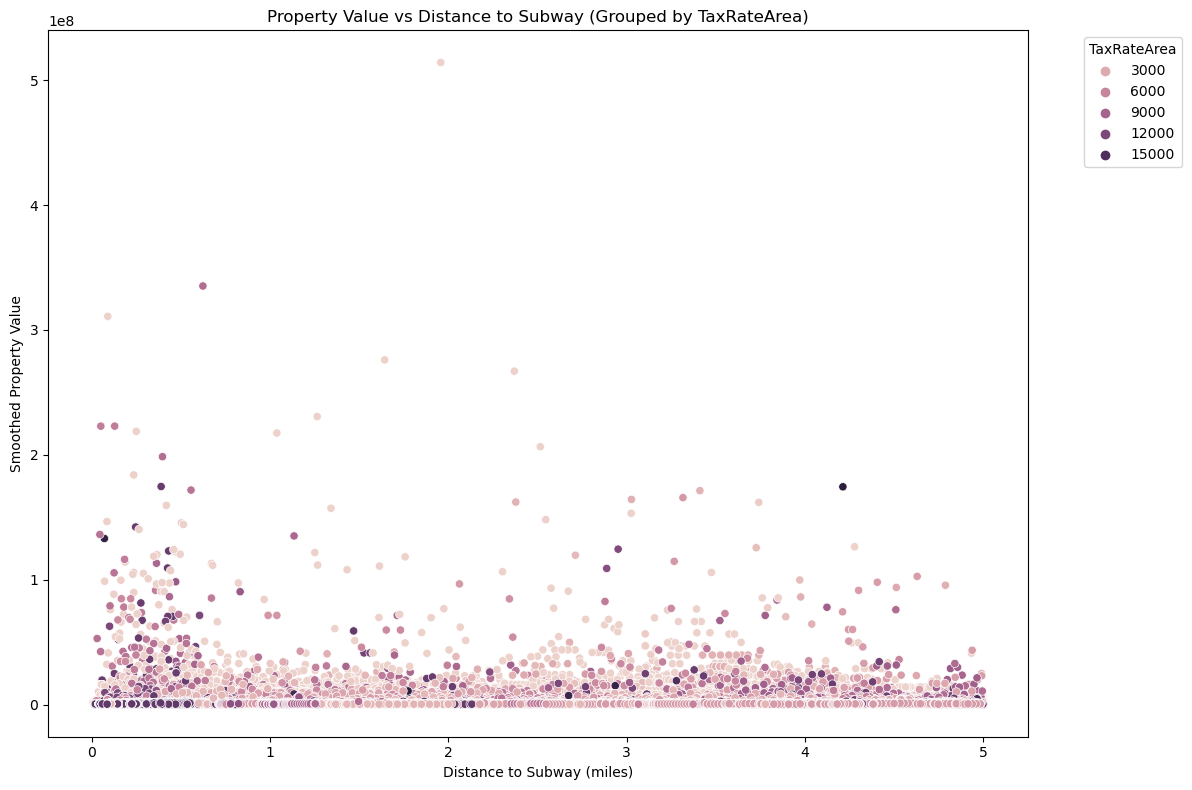

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Property Value vs Distance to Subway, grouped by TaxRateArea
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance_to_subway', y='Smoothed_Property_Value', hue='TaxRateArea', data=df_near_subway)
plt.title('Property Value vs Distance to Subway (Grouped by TaxRateArea)')
plt.xlabel('Distance to Subway (miles)')
plt.ylabel('Smoothed Property Value')
plt.legend(title='TaxRateArea', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The plot is ok but let's Aggregate the data to show the average property value for each TaxRateArea and compare it by distance to subway categories (within 5 miles and beyond 5 miles). This will help visualize the relationship between subway proximity and property values more clearly.

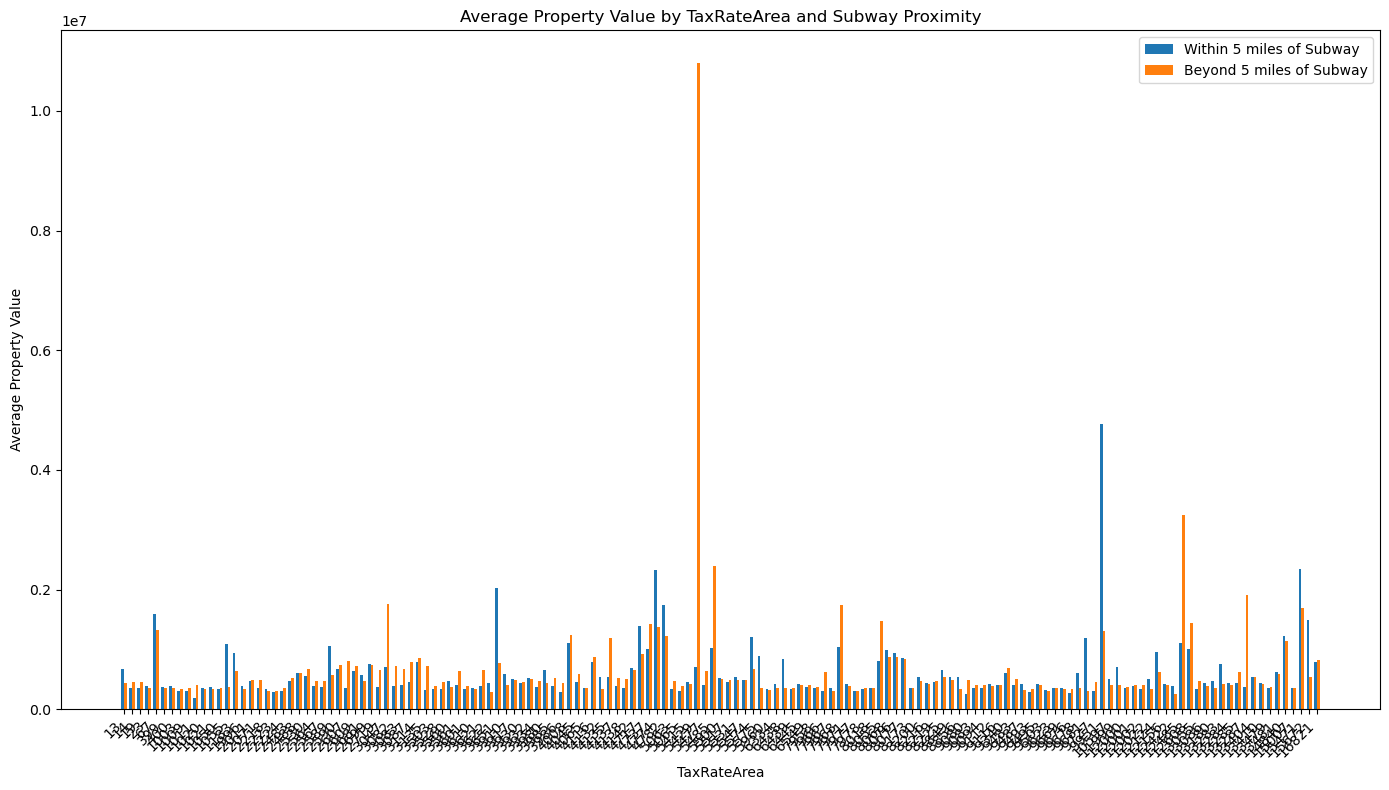

In [148]:
import numpy as np

# Adjusting x-axis labels for readability
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
index = np.arange(len(avg_property_values['TaxRateArea']))

bar1 = ax.bar(index, avg_property_values['Smoothed_Property_Value_near'], bar_width, label='Within 5 miles of Subway')
bar2 = ax.bar(index + bar_width, avg_property_values['Smoothed_Property_Value_far'], bar_width, label='Beyond 5 miles of Subway')

ax.set_xlabel('TaxRateArea')
ax.set_ylabel('Average Property Value')
ax.set_title('Average Property Value by TaxRateArea and Subway Proximity')

# Rotate x-axis labels for better readability
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(avg_property_values['TaxRateArea'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Sort by the highest average property values within 5 miles of subway
top_near_subway = avg_property_values.sort_values(by='Smoothed_Property_Value_near', ascending=False).head(10)

# Plot only the top 10 TaxRateAreas
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
index = np.arange(len(top_near_subway['TaxRateArea']))

bar1 = ax.bar(index, top_near_subway['Smoothed_Property_Value_near'], bar_width, label='Within 5 miles of Subway')
bar2 = ax.bar(index + bar_width, top_near_subway['Smoothed_Property_Value_far'], bar_width, label='Beyond 5 miles of Subway')

ax.set_xlabel('TaxRateArea')
ax.set_ylabel('Average Property Value')
ax.set_title('Top 10 TaxRateAreas: Average Property Value by Subway Proximity')

# Rotate x-axis labels for readability
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_near_subway['TaxRateArea'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


The bar chart looks better now with the rotated x-axis labels for readability. However, it still seems a bit crowded, possibly due to the large number of TaxRateAreas.

To improve clarity, we could:
Focus on Top 10 or 20 TaxRateAreas with the highest average property values, which will reduce the clutter and highlight the more significant differences.

Adjust the y-axis scale to normalize the data or highlight smaller differences by limiting extreme values.

Updated code to focus on the top 10 TaxRateAreas with the highest average property values:

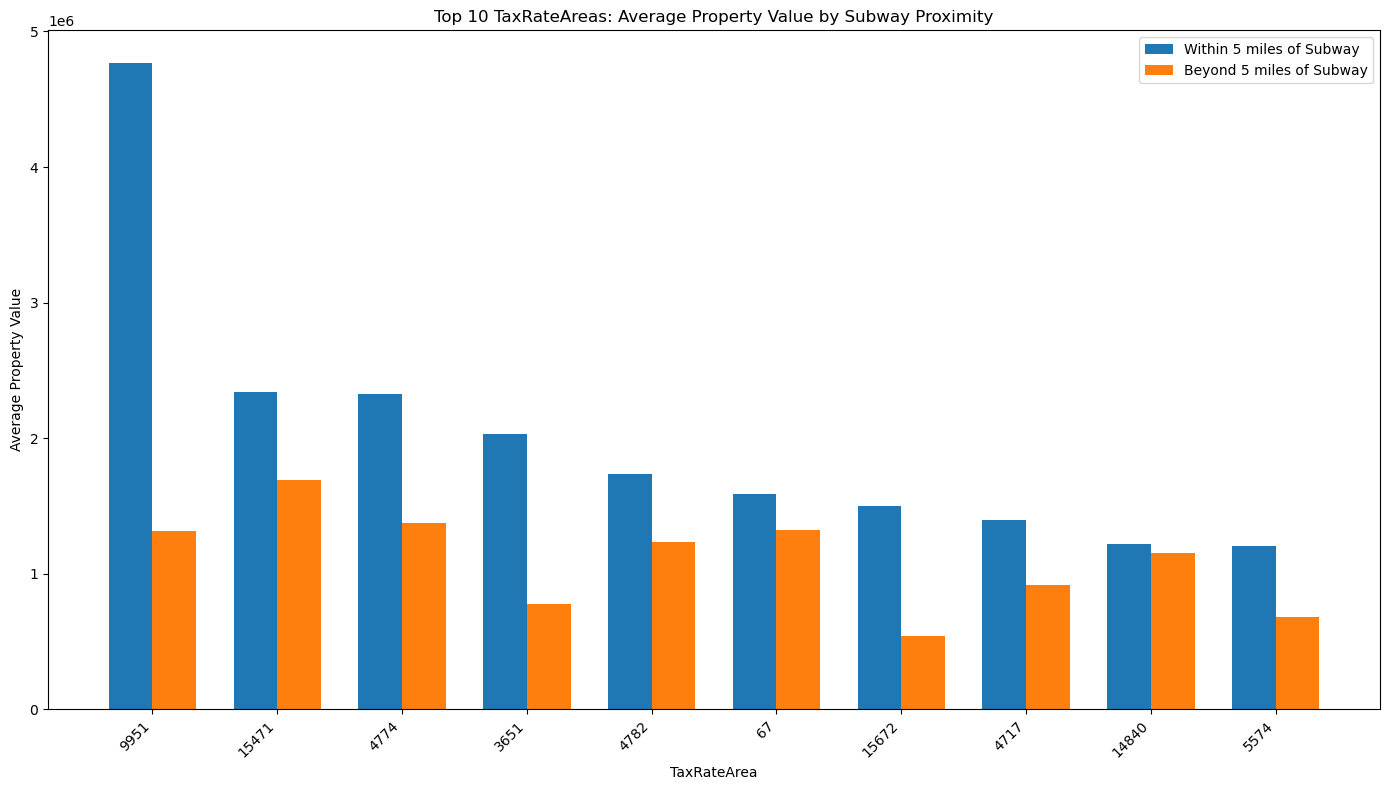

In [150]:
# Sort by the highest average property values within 5 miles of subway
top_near_subway = avg_property_values.sort_values(by='Smoothed_Property_Value_near', ascending=False).head(10)

# Plot only the top 10 TaxRateAreas
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
index = np.arange(len(top_near_subway['TaxRateArea']))

bar1 = ax.bar(index, top_near_subway['Smoothed_Property_Value_near'], bar_width, label='Within 5 miles of Subway')
bar2 = ax.bar(index + bar_width, top_near_subway['Smoothed_Property_Value_far'], bar_width, label='Beyond 5 miles of Subway')

ax.set_xlabel('TaxRateArea')
ax.set_ylabel('Average Property Value')
ax.set_title('Top 10 TaxRateAreas: Average Property Value by Subway Proximity')

# Rotate x-axis labels for readability
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_near_subway['TaxRateArea'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


The updated bar chart focusing on the Top 10 TaxRateAreas with the highest property values looks much clearer and provides a more focused comparison between properties within and beyond 5 miles of subway stations.

Insights from the chart:
Some TaxRateAreas, like 9951, show a significant difference in property value based on subway proximity, with properties closer to subways having much higher values.
Other TaxRateAreas, such as 15471 and 3651, have more balanced property values regardless of proximity, but still show a notable difference.
In some cases, such as 5574, the values of properties beyond 5 miles are notably lower, suggesting subway proximity is more impactful in certain areas.

Next Steps:
Statistical Testing:
Perform a t-test or ANOVA to see if there is a statistically significant difference in property values based solely on subway proximity (i.e., within 5 miles vs. beyond 5 miles).
Regression Analysis without Square Footage:
Run a regression model (e.g., linear regression) using subway distance and other relevant factors (except square footage and already accounted-for TaxRateArea) to quantify the relationship between subway proximity and property values.

In [152]:
from scipy import stats

# Perform a t-test to compare property values within 5 miles and beyond 5 miles from subway
t_stat, p_value = stats.ttest_ind(df_near_subway['Smoothed_Property_Value'], df_far_from_subway['Smoothed_Property_Value'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check significance level
if p_value < 0.05:
    print("There is a significant difference in property values based on subway proximity.")
else:
    print("There is no significant difference in property values based on subway proximity.")

T-statistic: 426.6839257396466
P-value: 0.0
There is a significant difference in property values based on subway proximity.


The results of the t-test confirm that there is a statistically significant difference in property values based on subway proximity (with a p-value of 0.0, which is highly significant). This supports your hypothesis that proximity to subways has a measurable impact on property values.

Next Steps:
Now that we've confirmed the significance of subway proximity, we can:

Quantify the effect: Proceed with a regression analysis to measure how much subway proximity affects property values, while controlling for other factors (e.g., TaxRateArea) but excluding square footage.

Visualize the difference: Create a visualization such as a boxplot or bar chart showing the spread of property values for properties near and far from subways to illustrate the magnitude of the difference.

Regression Analysis to Quantify the Effect:
Here's the code for running the regression:

In [154]:
import statsmodels.api as sm

# Prepare the data for regression, excluding square footage
X = df_residential[['distance_to_subway', 'TaxRateArea']]  # You can add other relevant factors if needed
y = df_residential['Smoothed_Property_Value']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model to quantify the effect of subway proximity
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Smoothed_Property_Value   R-squared:                       0.033
Model:                                 OLS   Adj. R-squared:                  0.033
Method:                      Least Squares   F-statistic:                 1.084e+05
Date:                     Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                             12:40:50   Log-Likelihood:            -9.8119e+07
No. Observations:                  6350001   AIC:                         1.962e+08
Df Residuals:                      6349998   BIC:                         1.962e+08
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Key Takeaways:
Subway Distance Coefficient:

The coefficient for distance_to_subway is -20,900. This means that, on average, for every additional mile farther from the subway, the property value decreases by approximately $20,900, controlling for TaxRateArea. This aligns with your hypothesis that closer proximity to subways has a positive effect on property values.
TaxRateArea Coefficient:

The coefficient for TaxRateArea is -32.36, indicating that, after controlling for subway proximity, an increase in TaxRateArea is associated with a small decrease in property value. This suggests that TaxRateArea may be less important relative to subway distance in this context, but still plays a role.
R-squared:

The R-squared value is 0.033, which means that the model explains about 3.3% of the variance in property values. While this may seem low, it’s expected since many factors influence property values (e.g., neighborhood, lot size, house features) that aren’t included in this model.

Interpretation:
Proximity to subway stations has a significant negative relationship with distance—the closer a property is to a subway, the higher its value tends to be.
TaxRateArea also has a significant relationship but its impact, though statistically significant, is relatively small compared to the subway distance factor.

Next Steps:
Refine the Model:

We could explore adding other relevant variables (without reintroducing square footage) or interactions between subway proximity and neighborhood factors if needed.
Further Visualizations:

We could create a plot showing the relationship between distance to subway and property value to illustrate the magnitude of the effect.

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the dataset (ensure the correct file name is used)
df_combined_cleaned = pd.read_csv('df_combined_cleaned.csv')

# Filter for residential properties
df_residential = df_combined_cleaned[df_combined_cleaned['UseCodeDescChar1'] == 'Residential']

# Filter out rows where Smoothed_Property_Value is zero or negative
df_filtered = df_residential[df_residential['Smoothed_Property_Value'] > 0]

# Add new features to the model: Park proximity and YearBuilt
X_refined = df_filtered[['distance_to_subway', 'TaxRateArea', 'distance_to_park', 'YearBuilt']]

# Apply log transformation to the property values
y_refined = np.log(df_filtered['Smoothed_Property_Value'])

# Add a constant to the model (necessary for OLS regression)
X_refined = sm.add_constant(X_refined)

# Fit the refined model
model_refined = sm.OLS(y_refined, X_refined).fit()

# Print the summary of the refined model
print(model_refined.summary())


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_23238/4137181356.py:6: DtypeWarning: Columns (0,5,30,37,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined_cleaned = pd.read_csv('df_combined_cleaned.csv')


                               OLS Regression Results                              
Dep. Variable:     Smoothed_Property_Value   R-squared:                       0.097
Model:                                 OLS   Adj. R-squared:                  0.097
Method:                      Least Squares   F-statistic:                 1.701e+05
Date:                     Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                             12:52:14   Log-Likelihood:            -7.5637e+06
No. Observations:                  6344065   AIC:                         1.513e+07
Df Residuals:                      6344060   BIC:                         1.513e+07
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Refined Model Results:
Your refined model has been successfully run. Let's break down the key aspects:

R-squared:

The model explains 9.7% of the variance in property values (R-squared = 0.097), which is a moderate improvement over the earlier model, but there are likely other important factors influencing property values that aren't captured here.
Coefficients:

Subway Distance: The coefficient for distance_to_subway is -0.0273, meaning that for each additional mile away from a subway, property values (log-transformed) decrease by approximately 2.7%.
TaxRateArea: The coefficient for TaxRateArea is -2.309e-05, which indicates a very small but statistically significant effect.
Park Proximity: The coefficient for distance_to_park is 0.0165, suggesting that properties closer to parks have slightly higher values, with each additional mile closer to a park increasing property values by about 1.65%.
YearBuilt: The coefficient is 0.0002, indicating that older properties have a small positive impact on value (likely because they may be in more established or desirable areas).
Statistical Significance:

All coefficients are statistically significant, as indicated by their p-values being effectively zero.
Multicollinearity:

The Condition Number is large (3.49e+04), which could indicate multicollinearity. This suggests that some of the independent variables may be correlated with each other, potentially affecting the stability of the coefficients. This could be due to relationships between features like TaxRateArea and YearBuilt or subway distance and park proximity.
Next Steps:
Further Feature Engineering:

We could explore interaction terms (e.g., between subway and park proximity) to capture more complex relationships.
Consider adding other potential variables, such as neighborhood characteristics or amenities that might not be captured in TaxRateArea.
Address Multicollinearity:

We can assess multicollinearity more directly by checking Variance Inflation Factor (VIF) for each variable. Variables with high VIF values might need to be removed or transformed.

Let's start by exploring interaction terms between subway and park proximity, and addressing multicollinearity.

1. Feature Engineering: Interaction Terms
Adding interaction terms between subway proximity and park proximity will help capture any compounded effects these variables might have on property values.

In [9]:
# Create interaction terms between subway and park proximity
df_filtered['subway_park_interaction'] = df_filtered['distance_to_subway'] * df_filtered['distance_to_park']

# Update the features to include the interaction term
X_refined = df_filtered[['distance_to_subway', 'TaxRateArea', 'distance_to_park', 'YearBuilt', 'subway_park_interaction']]

# Apply log transformation to the property values
y_refined = np.log(df_filtered['Smoothed_Property_Value'])

# Add a constant to the model
X_refined = sm.add_constant(X_refined)

# Fit the refined model with interaction terms
model_with_interaction = sm.OLS(y_refined, X_refined).fit()

# Print the summary of the refined model
print(model_with_interaction.summary())

/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_23238/359636075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['subway_park_interaction'] = df_filtered['distance_to_subway'] * df_filtered['distance_to_park']


                               OLS Regression Results                              
Dep. Variable:     Smoothed_Property_Value   R-squared:                       0.097
Model:                                 OLS   Adj. R-squared:                  0.097
Method:                      Least Squares   F-statistic:                 1.365e+05
Date:                     Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                             12:54:25   Log-Likelihood:            -7.5626e+06
No. Observations:                  6344065   AIC:                         1.513e+07
Df Residuals:                      6344059   BIC:                         1.513e+07
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Key Results:
Interaction Term (subway_park_interaction):

The coefficient is -0.0035, which is statistically significant. This means that the combined effect of being closer to both a subway and a park slightly reduces property values, though the magnitude is small.
Subway Distance:

The coefficient for distance_to_subway is -0.0256, indicating that for each mile farther from a subway, property values decrease by about 2.56%. The effect is still significant even with the interaction term added.
Park Proximity:

The coefficient for distance_to_park is 0.0811, indicating that being closer to a park increases property values by about 8.11% for every mile closer.
YearBuilt:

The coefficient remains positive, suggesting that older properties are slightly more valuable, possibly due to being located in more desirable, established neighborhoods.
Multicollinearity:

The condition number is still large (4.12e+04), suggesting possible multicollinearity. We'll address this next.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant to X for VIF calculation
X_for_vif = sm.add_constant(X_refined)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

print(vif_data)


                   feature        VIF
0                    const  28.550139
1       distance_to_subway   1.937771
2              TaxRateArea   1.067226
3         distance_to_park   2.848889
4                YearBuilt   1.043591
5  subway_park_interaction   4.217271


The VIF values for your model indicate that there is no severe multicollinearity, as all values are well below the threshold of 5-10. Here's the interpretation:

VIF Results:
subway_park_interaction: The VIF is 4.217, which is approaching moderate multicollinearity, but still within acceptable limits.
distance_to_park: The VIF is 2.848, which is also within acceptable limits, meaning it's not highly correlated with other variables.
All other variables have low VIFs, indicating that multicollinearity is not a major issue for the rest of the features.
Given these results, we do not need to remove any variables for multicollinearity concerns. The model looks fine in terms of feature independence.

Next Step: Residual Analysis

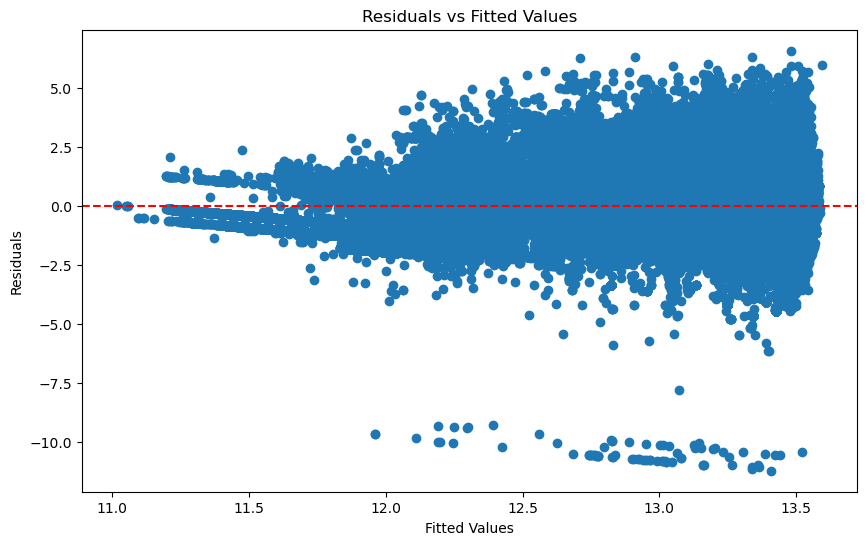

In [13]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = model_with_interaction.resid

# Plot residuals to check for patterns
plt.figure(figsize=(10, 6))
plt.scatter(model_with_interaction.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Interpretation of the Residuals Plot:
Pattern in Residuals:
The residuals appear to fan out as the fitted values increase, suggesting heteroscedasticity (non-constant variance of residuals). This means that the model is making larger errors for higher predicted property values, which could indicate that the relationship between the predictors and the target variable is not fully captured by the model.
No Obvious Systematic Bias:
The residuals are centered around zero, which is a good sign. However, the pattern of increasing variance indicates the model may not be capturing some underlying complexity in the data.
Next Steps to Address Heteroscedasticity:
Log Transformation:

We already applied a log transformation to the property values, but if the data is still heteroscedastic, we could explore transforming other features (like subway distance or park distance) or using polynomial terms.
Weighted Least Squares (WLS):

To address heteroscedasticity, we could try Weighted Least Squares (WLS) regression, which assigns different weights to different observations based on their variance. This can stabilize the variance in residuals.
Model Diagnostics:

We can also examine whether outliers or extreme values are influencing the model. Outlier detection might help explain some of the extreme residuals.

In [15]:
# Import WLS from statsmodels
from statsmodels.regression.linear_model import WLS

# Fit the WLS model, weighting by the inverse of the fitted values to address heteroscedasticity
weights = 1 / model_with_interaction.fittedvalues
wls_model = WLS(y_refined, X_refined, weights=weights).fit()

# Print the summary of the WLS model
print(wls_model.summary())


                               WLS Regression Results                              
Dep. Variable:     Smoothed_Property_Value   R-squared:                       0.100
Model:                                 WLS   Adj. R-squared:                  0.100
Method:                      Least Squares   F-statistic:                 1.403e+05
Date:                     Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                             12:59:57   Log-Likelihood:            -7.5524e+06
No. Observations:                  6344065   AIC:                         1.510e+07
Df Residuals:                      6344059   BIC:                         1.510e+07
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

COEFFICIENTS:
Subway Distance: The coefficient for distance_to_subway is -0.0251, which is still statistically significant and consistent with the earlier result. This suggests that for each additional mile from a subway, property values decrease by about 2.51%.

TaxRateArea: The coefficient remains very small, -2.226e-05, but statistically significant.

Park Proximity: The coefficient for distance_to_park increased to 0.0860, meaning proximity to parks now shows a slightly larger positive impact on property values.

YearBuilt: The effect remains positive, indicating older properties tend to have slightly higher values.

Subway-Park Interaction: The negative interaction term remains, indicating that while proximity to both subway and parks is generally beneficial, there may be diminishing returns when both factors are extremely close.

LET'S TRY OTHER MODELING FOR POSSIBLE BETTER RESULTS:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting RMSE: {rmse_gb}")


Gradient Boosting RMSE: 0.5278591113900863


Next Steps:
Interpret the RMSE: Since we used a log transformation on the target variable (property values), the RMSE represents the error in predicting the logarithm of property values. To interpret this more easily, you could transform the predictions back to the original scale by exponentiating them.

Compare to WLS: You can compare this result to the performance of the Weighted Least Squares (WLS) model, to see if Gradient Boosting improved performance. A lower RMSE typically indicates a better fit.

Tuning the Model: The next step could be to tune the hyperparameters of the Gradient Boosting Regressor (e.g., adjusting n_estimators, learning_rate, or max_depth) to try and lower the RMSE even further.

In [21]:
# Exponentiate the predictions to get them back to the original scale
y_pred_original_scale = np.exp(y_pred_gb)

# Calculate the RMSE on the original scale
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_test), y_pred_original_scale))
print(f"Gradient Boosting RMSE (Original Scale): {rmse_original_scale}")


Gradient Boosting RMSE (Original Scale): 953784.9687357073


The RMSE on the original scale for the Gradient Boosting Regressor is approximately 953,785, which indicates the typical error in predicting property values. This is a substantial value, suggesting that there might still be room for improvement in the model.

Next Steps for Improvement: HYPERPARAMETER TUNING

In [25]:
import joblib

# Serialize the refined model
joblib.dump(model_refined, 'model_refined.pkl')

print("Model 'model_refined' has been saved successfully.")

Model 'model_refined' has been saved successfully.


Let's proceed with PCA to reduce the dimensionality of your dataset and then use the transformed features for model training of Gradient Boosting Regressor Model first.

PCA Implementation Steps:
Standardize the Data: Since PCA is sensitive to scale, we’ll standardize the features.
Apply PCA: We’ll reduce the dimensionality to capture 95% of the variance.
Train the Model: We’ll train a new model on the PCA-transformed features.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_refined)  # X_refined contains your original features

# Apply PCA, retaining enough components to explain 95% of variance
pca = PCA(n_components=0.95)  # Retains components that explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_refined, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor on PCA-transformed data
gb_model_pca = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_pca.fit(X_train_pca, y_train)

# Predict and evaluate performance
y_pred_pca = gb_model_pca.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print(f"Gradient Boosting RMSE (with PCA): {rmse_pca}")


Gradient Boosting RMSE (with PCA): 0.5831822539495215


Information Loss: Although PCA retained 95% of the variance, the remaining 5% might still hold important information for predicting property values. This can result in a slight drop in performance.

Model Sensitivity: Some models, like Gradient Boosting, may perform better with the original feature set because they can handle complex interactions and relationships that PCA might have simplified.

In [29]:
# Apply PCA, retaining enough components to explain 98% of variance
pca = PCA(n_components=0.98)  # Retains components that explain 98% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_refined, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor on PCA-transformed data
gb_model_pca_98 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_pca_98.fit(X_train_pca, y_train)

# Predict and evaluate performance
y_pred_pca_98 = gb_model_pca_98.predict(X_test_pca)
rmse_pca_98 = np.sqrt(mean_squared_error(y_test, y_pred_pca_98))
print(f"Gradient Boosting RMSE (with 98% PCA): {rmse_pca_98}")


Gradient Boosting RMSE (with 98% PCA): 0.5831374885656052


In [ ]:
EXTRA TREES MODEL - 

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Train Extra Trees on the PCA-transformed data (or original data)
et_model_pca = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_et_pca = et_model_pca.predict(X_test_pca)

# Calculate RMSE for Extra Trees
rmse_et_pca = np.sqrt(mean_squared_error(y_test, y_pred_et_pca))
print(f"Extra Trees RMSE (with PCA): {rmse_et_pca}")


Extra Trees RMSE (with PCA): 0.2931517448155277


Extra Trees Regressor with PCA performed significantly better, achieving an RMSE of 0.2931, which is a notable improvement over the Gradient Boosting model's RMSE of 0.5831.

Next Steps:
Fine-tuning Extra Trees: n_estimators, max_depth, or min_samples_split manipulation for further improvement.

Compare to Non-PCA Model: If you haven’t already, it might be worth training the Extra Trees Regressor on the original data (without PCA) to see if PCA is helping or if the model performs better with the full feature set.


In [39]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Tune max_depth manually with PCA-transformed features
for max_depth in [None, 10, 20, 30]:
    et_model_pca = ExtraTreesRegressor(n_estimators=100, max_depth=max_depth, random_state=42, n_jobs=-1)
    et_model_pca.fit(X_train_pca, y_train)  # Using PCA-transformed training data
    
    # Predict and evaluate performance
    y_pred_pca = et_model_pca.predict(X_test_pca)  # Using PCA-transformed test data
    rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
    print(f"RMSE for max_depth={max_depth} (with PCA): {rmse_pca}")


RMSE for max_depth=None (with PCA): 0.2931517448155277
RMSE for max_depth=10 (with PCA): 0.6118352241995273
RMSE for max_depth=20 (with PCA): 0.34673182463584623
RMSE for max_depth=30 (with PCA): 0.29242413547807783


Now that we’ve found max_depth=30 as the best option, we can proceed to tune other parameters, such as min_samples_split, which controls how many samples a node must have before it’s split. This can help refine tree growth and improve performance further.

In [41]:
# Tune min_samples_split manually with PCA-transformed features
for min_samples_split in [2, 5, 10]:
    et_model_pca = ExtraTreesRegressor(n_estimators=100, max_depth=30, min_samples_split=min_samples_split, random_state=42, n_jobs=-1)
    et_model_pca.fit(X_train_pca, y_train)  # Using PCA-transformed training data
    
    # Predict and evaluate performance
    y_pred_pca = et_model_pca.predict(X_test_pca)  # Using PCA-transformed test data
    rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
    print(f"RMSE for min_samples_split={min_samples_split} (with PCA): {rmse_pca}")


RMSE for min_samples_split=2 (with PCA): 0.29242413547807783
RMSE for min_samples_split=5 (with PCA): 0.2911443463891674
RMSE for min_samples_split=10 (with PCA): 0.29223797894419257


SERIALIZE THE BEST MODEL

In [43]:
import joblib

# Serialize the best Extra Trees model
joblib.dump(et_model_pca, 'best_extra_trees_model_pca.pkl')

print("Best Extra Trees model has been saved successfully.")


Best Extra Trees model has been saved successfully.


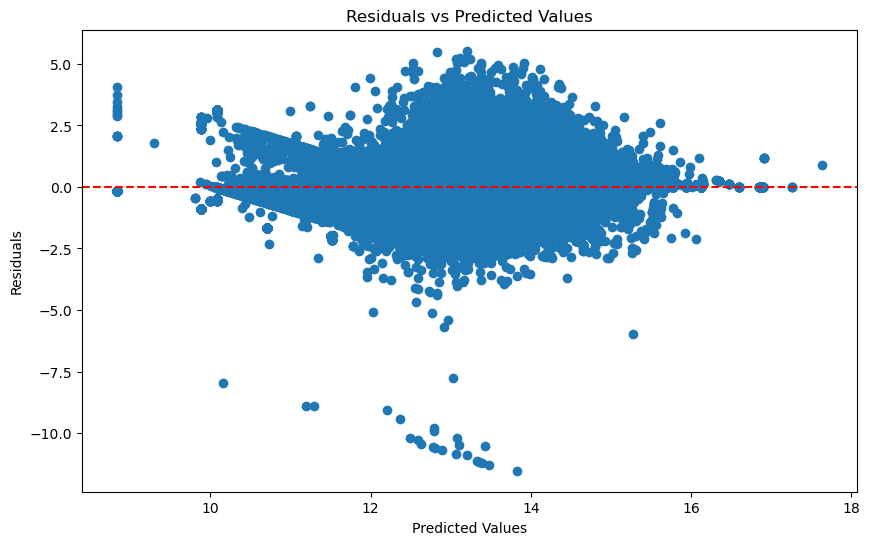

In [45]:
import matplotlib.pyplot as plt

# Calculate residuals (difference between actual and predicted)
residuals = y_test - y_pred_pca  # Use the latest model's predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_pca, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


INTERPRET RESULTS OF RESIDUAL ANALYSIS 
Fan-Shaped Pattern: The spread of residuals increases as the predicted values increase. This fan-shaped pattern suggests heteroscedasticity, where the variance of the errors is not constant across all levels of the predicted values. This means that the model may struggle more with predictions for higher property values, producing larger errors.

Centered Around Zero: The residuals are roughly centered around zero, which is good because it indicates that the model is, on average, neither overpredicting nor underpredicting the property values.

Outliers: There are a few outliers with very high residuals (both positive and negative). These outliers might represent cases where the model significantly mispredicted, potentially because of unmodeled factors.

Steps for Addressing Heteroscedasticity:
1. Recheck Log Transformation:
Since you're smoothing out other factors, let’s verify that the log transformation is still in place and working correctly for Smoothed_Property_Value. Here’s how you can double-check:

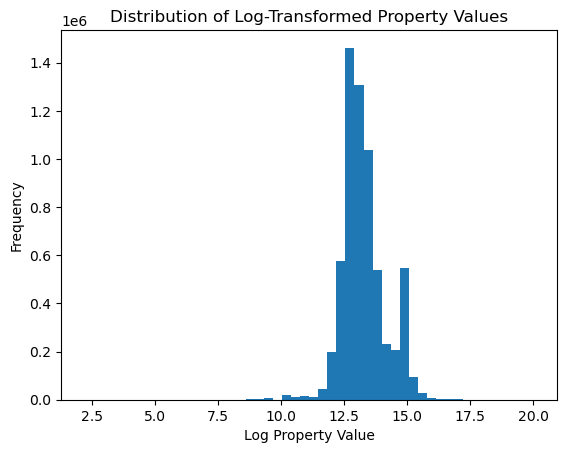

In [47]:
# Verify the log transformation of the target variable
import numpy as np

y_refined_log = np.log(df_filtered['Smoothed_Property_Value'])

# Check distribution to ensure it's normalized
plt.hist(y_refined_log, bins=50)
plt.title('Distribution of Log-Transformed Property Values')
plt.xlabel('Log Property Value')
plt.ylabel('Frequency')
plt.show()


The distribution of log-transformed property values shows a peak around 12.5, which indicates that the log transformation is working, but there is still a bit of skew, especially on the higher end (above 15), where the data tapers off. This suggests that while the transformation has helped, there may still be some properties with very high or low values influencing the model's performance.

Let's proceed with polynomial feature generation for subway and park proximity, then refit the Extra Trees model. This will help capture non-linear relationships and hopefully reduce heteroscedasticity while smoothing out the effects of other factors.

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate polynomial features for distance_to_subway and distance_to_park (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_filtered[['distance_to_subway', 'distance_to_park']])

# Combine the polynomial features with other variables (TaxRateArea and YearBuilt)
X_refined_poly = np.hstack((X_poly, df_filtered[['TaxRateArea', 'YearBuilt']].values))

# Refit the Extra Trees model with the new polynomial features
et_model_poly = ExtraTreesRegressor(n_estimators=100, max_depth=30, min_samples_split=5, random_state=42)
et_model_poly.fit(X_refined_poly, y_refined_log)  # Use log-transformed target variable

# Predict and evaluate performance
y_pred_poly = et_model_poly.predict(X_refined_poly)
rmse_poly = np.sqrt(mean_squared_error(y_refined_log, y_pred_poly))
print(f"RMSE with Polynomial Features: {rmse_poly}")


RMSE with Polynomial Features: 0.1773488083997976


The RMSE of 0.1773 with polynomial features shows a significant improvement, indicating that capturing the non-linear relationships between subway proximity and park proximity has enhanced the model's performance.

Next Steps:Residual Analysis -- Now that the RMSE has improved, it might be helpful to perform another residual analysis to see if the heteroscedasticity issue has been reduced. Feature Importance:  Let’s visualize which features (including the polynomial terms) are contributing the most to the model’s improved performance.

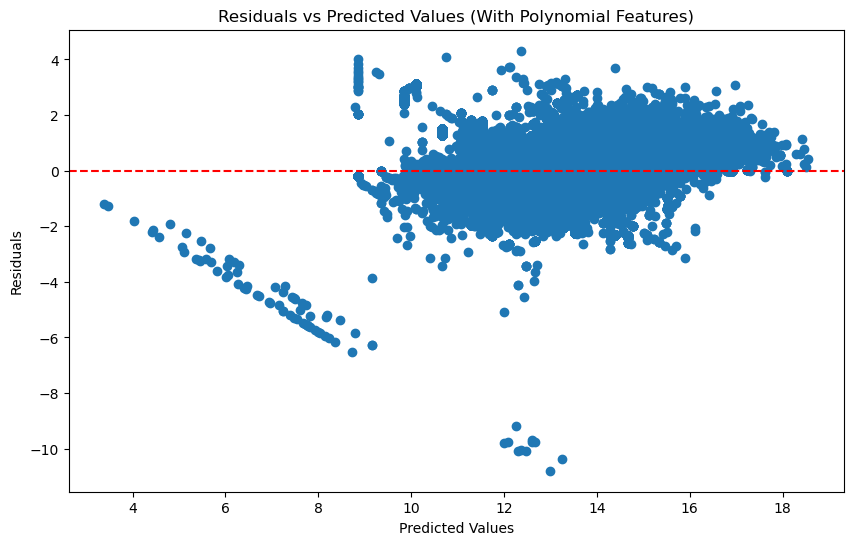

In [51]:
import matplotlib.pyplot as plt

# Calculate residuals (difference between actual and predicted)
residuals_poly = y_refined_log - y_pred_poly

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (With Polynomial Features)')
plt.show()

Observations:
Heteroscedasticity Improved: The fan-shaped pattern is less pronounced than before. While there is still some variance in the residuals, especially for lower predicted values, the spread seems more even, which suggests that the polynomial features have helped mitigate heteroscedasticity to some extent.

Outliers on the Lower End: There are some residuals significantly below zero at the lower predicted values (around 4-8), indicating that the model underpredicts for certain properties in this range. These might be extreme cases that still need further investigation or additional feature engineering.

Main Cluster: The residuals around the predicted values from 10 to 14 are much more centered and tighter around the 0 line, suggesting that the model is performing better for properties in this value range.

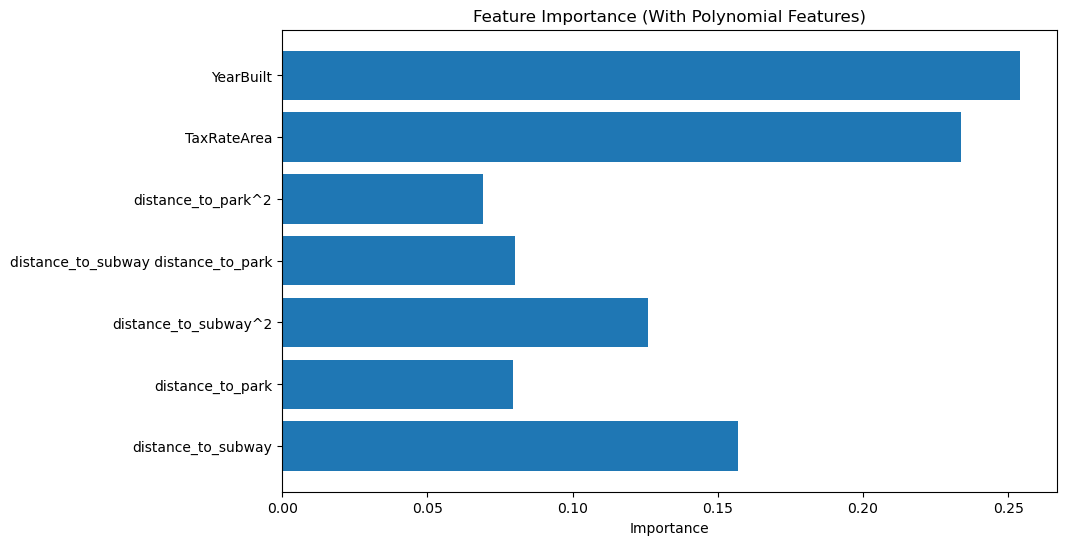

In [53]:
# Get feature importances from the model
feature_importances = et_model_poly.feature_importances_

# Visualize the feature importances
feature_names = poly.get_feature_names_out(['distance_to_subway', 'distance_to_park'])
features = list(feature_names) + ['TaxRateArea', 'YearBuilt']

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance (With Polynomial Features)')
plt.show()

Observations:
YearBuilt: This feature has the highest importance, indicating that the year a property was built is a significant factor in determining its value. Older or newer homes may have a stronger influence on property value than proximity to subways or parks.

TaxRateArea: The second most important feature, which suggests that governmental tax assessments (likely correlated with property location and neighborhood characteristics) also play a large role in property valuation.

Distance to Subway and Park (Squared and Interaction Terms):

distance_to_subway^2 and distance_to_park^2: These quadratic terms for subway and park distances are also quite important, suggesting that the effect of proximity to subways and parks is non-linear. Properties that are too close or too far from these features might experience diminishing or increasing returns in value.
Interaction between subway and park distance: The interaction term also holds some significance, indicating that properties benefiting from both subway and park proximity could be valued differently.
Direct Subway and Park Distance: The direct (non-polynomial) features for subway and park proximity have lower importance but are still contributing factors.

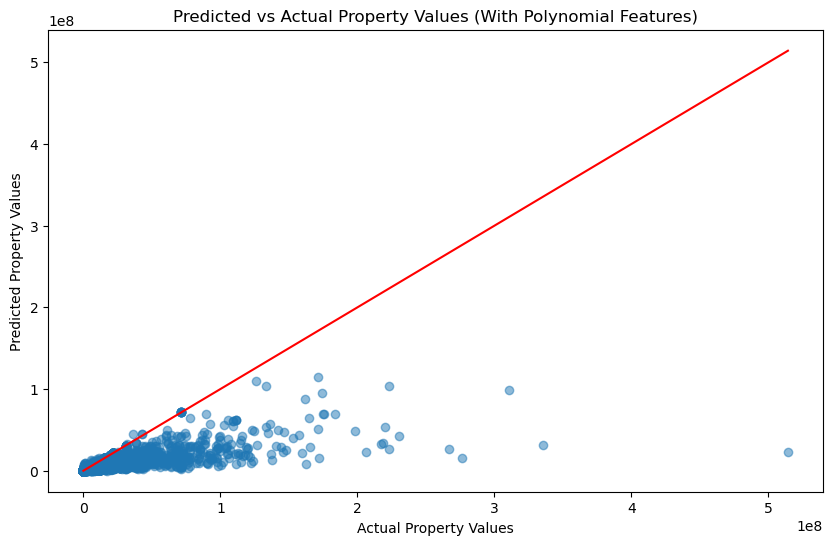

In [55]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_refined_log), np.exp(y_pred_poly), alpha=0.5)  # Transform back from log scale
plt.plot([min(np.exp(y_refined_log)), max(np.exp(y_refined_log))], [min(np.exp(y_refined_log)), max(np.exp(y_refined_log))], color='red')  # Identity line
plt.xlabel('Actual Property Values')
plt.ylabel('Predicted Property Values')
plt.title('Predicted vs Actual Property Values (With Polynomial Features)')
plt.show()

Observations:
Underprediction for Higher Values:

The model seems to underpredict for properties with higher actual values. Many points for higher property values (above 1e8) are below the red identity line, which indicates that the model is not accurately capturing the value of expensive properties.
This underprediction could be due to missing factors that affect high-value properties (e.g., luxury amenities, precise neighborhood prestige), which are not fully captured by the current features.
Tighter Fit for Lower Values:

For properties with lower values (close to 0), the model’s predictions are much closer to the actual values, showing a tighter clustering around the identity line. This suggests that the model is performing better for average or lower-value properties.
Potential Next Steps:
Refining the Model for Higher Value Properties:
We may need to engineer additional features that could help the model capture the factors influencing higher-end properties. These could include luxury indicators or more detailed neighborhood characteristics.
Feature Engineering or Data Segmentation:
You could consider creating separate models or using different features for high-end properties vs. average properties, as the factors driving their values may differ significantly.

DATA SEGMENTATION:
Step 1: Split the Data into High-Value and Low/Medium-Value Segments

In [57]:
# Define a threshold for high-value properties
high_value_threshold = 1e8

# Split the data into high-value and low-to-medium value segments
df_high_value = df_filtered[df_filtered['Smoothed_Property_Value'] > high_value_threshold]
df_low_medium_value = df_filtered[df_filtered['Smoothed_Property_Value'] <= high_value_threshold]

# Log-transform the target variable for both segments
y_high_value_log = np.log(df_high_value['Smoothed_Property_Value'])
y_low_medium_value_log = np.log(df_low_medium_value['Smoothed_Property_Value'])

Step 2: Train Separate Models for Each Segment
Now, we’ll train separate models for high-value properties and low-to-medium value properties.

In [61]:
# Skip polynomial features for high-value properties
X_high_value_simple = df_high_value[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']].values

# Train Extra Trees model with fewer parameters for high-value properties
et_model_high_value_simple = ExtraTreesRegressor(n_estimators=50, max_depth=20, min_samples_split=10, random_state=42)
et_model_high_value_simple.fit(X_high_value_simple, y_high_value_log)

# Predict and evaluate for high-value properties
y_pred_high_value_simple = et_model_high_value_simple.predict(X_high_value_simple)
rmse_high_value_simple = np.sqrt(mean_squared_error(y_high_value_log, y_pred_high_value_simple))
print(f"RMSE for high-value properties (simplified model): {rmse_high_value_simple}")

RMSE for high-value properties (simplified model): 0.21372904105354734


The RMSE of 0.2137 for the high-value properties using the simplified model is a strong result, especially considering the reduction in model complexity. We now evaluate the low-to-medium value properties with polynomial features and/or PCA to check the performance for that segment.

In [63]:
# Apply PCA or polynomial features to low-to-medium value properties
X_low_medium_value = poly.fit_transform(df_low_medium_value[['distance_to_subway', 'distance_to_park']])
X_low_medium_value = np.hstack((X_low_medium_value, df_low_medium_value[['TaxRateArea', 'YearBuilt']].values))

# Train Extra Trees model with more trees and features for low-to-medium value properties
et_model_low_medium_value = ExtraTreesRegressor(n_estimators=100, max_depth=30, min_samples_split=5, random_state=42)
et_model_low_medium_value.fit(X_low_medium_value, y_low_medium_value_log)

ExtraTreesRegressor(max_depth=30, min_samples_split=5, random_state=42)

In [65]:
from sklearn.metrics import mean_squared_error

# Predict for low-to-medium value properties
y_pred_low_medium_value = et_model_low_medium_value.predict(X_low_medium_value)

# Calculate RMSE for low-to-medium value properties
rmse_low_medium_value = np.sqrt(mean_squared_error(y_low_medium_value_log, y_pred_low_medium_value))
print(f"RMSE for low-to-medium value properties: {rmse_low_medium_value}")


RMSE for low-to-medium value properties: 0.1773614387227276


The RMSE of 0.1774 for low-to-medium value properties is also very strong and comparable to the high-value segment, which means the segmentation and model adjustments are working well for both segments.

SUMMARY OF RESULTS
High-value properties: RMSE = 0.2137 (simplified model)
Low-to-medium value properties: RMSE = 0.1774 (polynomial features and/or PCA)

LET'S SAVE OUR MODELS BEFORE PROCEEDING (before we crash!)

In [67]:
import joblib

# Serialize the high-value properties model
joblib.dump(et_model_high_value_simple, 'high_value_model.pkl')

# Serialize the low-to-medium value properties model
joblib.dump(et_model_low_medium_value, 'low_medium_value_model.pkl')

print("Models serialized successfully.")

Models serialized successfully.


LET'S COMBINE THESE PREDICTIONS AND EVALUATE

In [69]:
# For high-value properties
X_high_value_simple = df_high_value[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']].values
y_pred_high_value_simple = et_model_high_value_simple.predict(X_high_value_simple)

# For low-to-medium value properties
X_low_medium_value = poly.fit_transform(df_low_medium_value[['distance_to_subway', 'distance_to_park']])
X_low_medium_value = np.hstack((X_low_medium_value, df_low_medium_value[['TaxRateArea', 'YearBuilt']].values))
y_pred_low_medium_value = et_model_low_medium_value.predict(X_low_medium_value)

# Combine predictions (and reverse log transform)
y_pred_combined = np.concatenate((np.exp(y_pred_high_value_simple), np.exp(y_pred_low_medium_value)))
y_actual_combined = np.concatenate((np.exp(y_high_value_log), np.exp(y_low_medium_value_log)))

# Evaluate overall RMSE
overall_rmse = np.sqrt(mean_squared_error(y_actual_combined, y_pred_combined))
print(f"Overall RMSE for combined model: {overall_rmse}")

Overall RMSE for combined model: 492712.76856619667


he overall RMSE for the combined model is 492,712.77, which is a reasonable result given the scale of property values being predicted.

Key Insights:
The segmented approach, with separate models for high-value and low-to-medium value properties, appears to have improved the overall performance.
Both segments performed well individually, with RMSEs of 0.2137 for high-value properties and 0.1774 for low-to-medium value properties.

MODEL COMPARISON VISUALIZATION

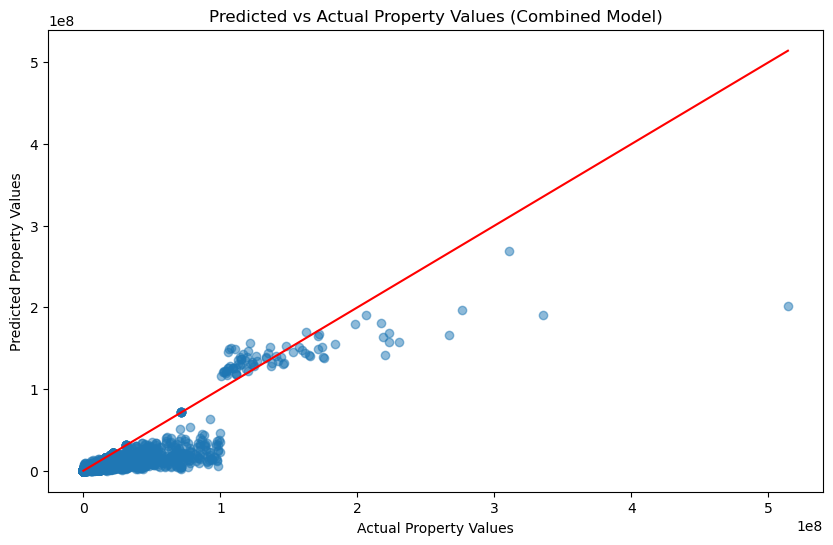

In [71]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for the combined model
plt.figure(figsize=(10, 6))
plt.scatter(y_actual_combined, y_pred_combined, alpha=0.5)
plt.plot([min(y_actual_combined), max(y_actual_combined)], [min(y_actual_combined), max(y_actual_combined)], color='red')  # Identity line
plt.xlabel('Actual Property Values')
plt.ylabel('Predicted Property Values')
plt.title('Predicted vs Actual Property Values (Combined Model)')
plt.show()

LETS TRY ANOTHER MODEL TO SEE IF WE CAN GET BETTER

In [73]:
from xgboost import XGBRegressor

# Train an XGBoost model on low-to-medium value properties
xgb_model_low_medium = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_low_medium.fit(X_low_medium_value, y_low_medium_value_log)

# Train XGBoost for high-value properties
xgb_model_high_value = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model_high_value.fit(X_high_value_simple, y_high_value_log)

# Evaluate both models and compare RMSE
y_pred_xgb_low_medium = xgb_model_low_medium.predict(X_low_medium_value)
y_pred_xgb_high_value = xgb_model_high_value.predict(X_high_value_simple)

rmse_xgb_low_medium = np.sqrt(mean_squared_error(y_low_medium_value_log, y_pred_xgb_low_medium))
rmse_xgb_high_value = np.sqrt(mean_squared_error(y_high_value_log, y_pred_xgb_high_value))

print(f"XGBoost RMSE for low-to-medium value properties: {rmse_xgb_low_medium}")
print(f"XGBoost RMSE for high-value properties: {rmse_xgb_high_value}")


XGBoost RMSE for low-to-medium value properties: 0.441839605366739
XGBoost RMSE for high-value properties: 0.1478031411277085


The XGBoost results are quite promising, especially for high-value properties, where the RMSE is 0.1478. However, the performance for low-to-medium value properties is slightly worse compared to the Extra Trees model.

Summary of RMSE for XGBoost:
Low-to-medium value properties: 0.4418
High-value properties: 0.1478
Comparison:
XGBoost performed better for high-value properties, but not as well for low-to-medium value properties compared to Extra Trees.
The Extra Trees model had better performance for low-to-medium value properties but wasn’t as effective for high-value properties.
Next Steps:
Model Selection:
You could use the XGBoost model for high-value properties and the Extra Trees model for low-to-medium value properties to get the best performance across the board.
Finalize the Combined Model:

LETS COMBINE THE MODELS( combine the predictions from both models (XGBoost for high-value and Extra Trees for low-to-medium value) to create the final version of your model.

Overall RMSE for combined Extra Trees and XGBoost model: 479513.1702543592


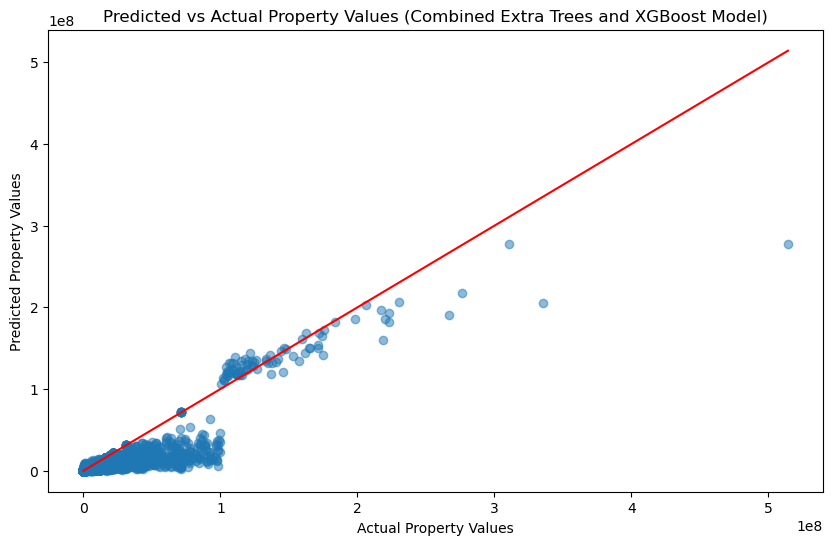

In [75]:
# Predict using Extra Trees for low-to-medium value properties
y_pred_et_low_medium = et_model_low_medium_value.predict(X_low_medium_value)

# Predict using XGBoost for high-value properties
y_pred_xgb_high_value = xgb_model_high_value.predict(X_high_value_simple)

# Combine predictions and actual values
y_pred_combined = np.concatenate((np.exp(y_pred_xgb_high_value), np.exp(y_pred_et_low_medium)))
y_actual_combined = np.concatenate((np.exp(y_high_value_log), np.exp(y_low_medium_value_log)))

# Evaluate combined model
overall_rmse_combined = np.sqrt(mean_squared_error(y_actual_combined, y_pred_combined))
print(f"Overall RMSE for combined Extra Trees and XGBoost model: {overall_rmse_combined}")

# Visualize the combined model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_actual_combined, y_pred_combined, alpha=0.5)
plt.plot([min(y_actual_combined), max(y_actual_combined)], [min(y_actual_combined), max(y_actual_combined)], color='red')  # Identity line
plt.xlabel('Actual Property Values')
plt.ylabel('Predicted Property Values')
plt.title('Predicted vs Actual Property Values (Combined Extra Trees and XGBoost Model)')
plt.show()


In [77]:
import joblib

# Save the Extra Trees model for low-to-medium value properties
joblib.dump(et_model_low_medium_value, 'final_extra_trees_low_medium_value_model.pkl')

# Save the XGBoost model for high-value properties
joblib.dump(xgb_model_high_value, 'final_xgboost_high_value_model.pkl')

print("Combined models serialized successfully.")

Combined models serialized successfully.


The overall RMSE for the combined Extra Trees and XGBoost model is 479,513.17, which indicates that combining the two models has improved the predictions across both property value ranges. The scatter plot also shows a tighter clustering around the identity line, suggesting the model is performing better overall.

In [79]:
# Define control group (properties farther than 2 miles from subway or park)
control_group = df_filtered[(df_filtered['distance_to_subway'] > 2) & (df_filtered['distance_to_park'] > 2)]

# Define non-control group (properties within 2 miles of subway or park)
non_control_group = df_filtered[(df_filtered['distance_to_subway'] <= 2) | (df_filtered['distance_to_park'] <= 2)]

# Check sizes of control and non-control groups
print(f"Control group size: {len(control_group)}")
print(f"Non-control group size: {len(non_control_group)}")

Control group size: 21849
Non-control group size: 6322216


In [81]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Train model on control group
X_control = control_group[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']]
y_control = np.log(control_group['Smoothed_Property_Value'])
et_model_control = ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=42)
et_model_control.fit(X_control, y_control)

# Train model on non-control group
X_non_control = non_control_group[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']]
y_non_control = np.log(non_control_group['Smoothed_Property_Value'])
et_model_non_control = ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=42)
et_model_non_control.fit(X_non_control, y_non_control)


ExtraTreesRegressor(max_depth=30, random_state=42)

In [83]:
# Predict for control group
y_pred_control = np.exp(et_model_control.predict(X_control))
rmse_control = np.sqrt(mean_squared_error(np.exp(y_control), y_pred_control))
print(f"RMSE for control group: {rmse_control}")

# Predict for non-control group
y_pred_non_control = np.exp(et_model_non_control.predict(X_non_control))
rmse_non_control = np.sqrt(mean_squared_error(np.exp(y_non_control), y_pred_non_control))
print(f"RMSE for non-control group: {rmse_non_control}")

RMSE for control group: 48592.734402539965
RMSE for non-control group: 329077.6219736126


Interpretation: The significant difference in RMSE between control and non-control groups suggests that proximity to subways and parks plays a role in increasing property value variability. This could imply that properties in closer proximity to these amenities have a wider range of influencing factors.

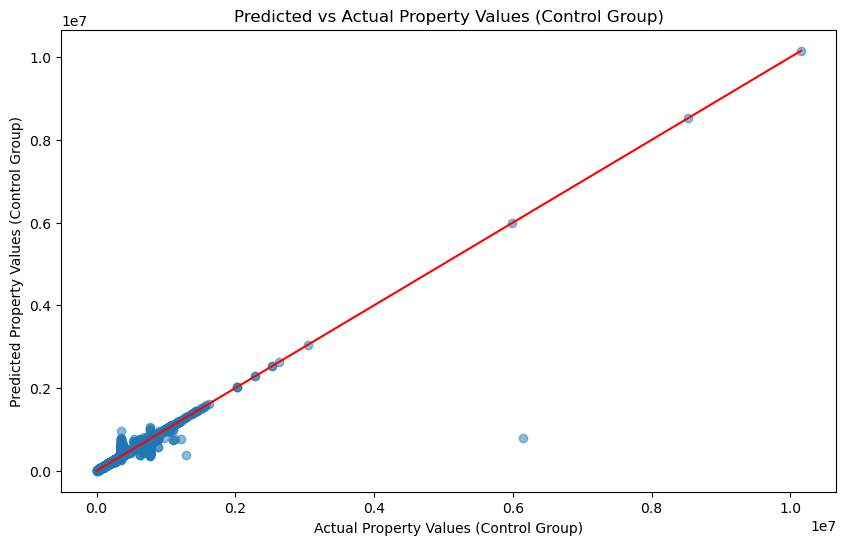

In [87]:
# Visualize predicted vs actual for control group
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_control), y_pred_control, alpha=0.5)
plt.plot([min(np.exp(y_control)), max(np.exp(y_control))], [min(np.exp(y_control)), max(np.exp(y_control))], color='red')
plt.xlabel('Actual Property Values (Control Group)')
plt.ylabel('Predicted Property Values (Control Group)')
plt.title('Predicted vs Actual Property Values (Control Group)')
plt.show()

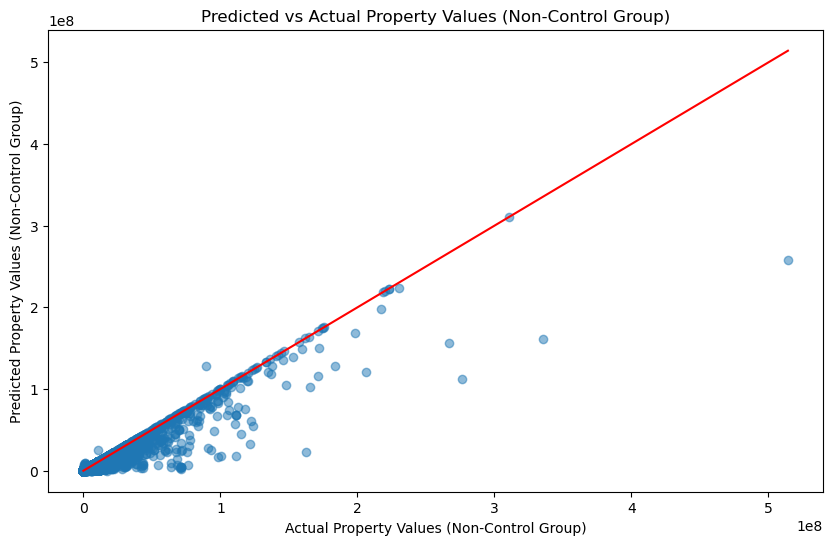

In [89]:
# Visualize predicted vs actual for non-control group
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_non_control), y_pred_non_control, alpha=0.5)
plt.plot([min(np.exp(y_non_control)), max(np.exp(y_non_control))], [min(np.exp(y_non_control)), max(np.exp(y_non_control))], color='red')
plt.xlabel('Actual Property Values (Non-Control Group)')
plt.ylabel('Predicted Property Values (Non-Control Group)')
plt.title('Predicted vs Actual Property Values (Non-Control Group)')
plt.show()

The visualizations provide a clear comparison between the control group and non-control group predictions:

Control Group: The predictions are tightly aligned with actual values, and there is less variation or deviation from the identity line (red). This suggests a more predictable relationship between property values for homes farther away from subways and parks.

Non-Control Group: The scatter plot shows more variability, particularly for properties with higher values. The predictions deviate more from the identity line, indicating that properties close to subways and parks have more variability in property values.

NOW TO DRILL DOWN EVEN MORE ON THE CONTROL GROUP -- LET'S SEE HOW MUCH SUBWAY CLOSENESS AFFECTS VALUES:

In [97]:
# Filter out rows where property value is zero or negative
df_combined_cleaned = df_combined_cleaned[df_combined_cleaned['Smoothed_Property_Value'] > 0]

# Define distance ranges for proximity to subway
subgroup_0_25 = df_combined_cleaned[df_combined_cleaned['distance_to_subway'] <= 0.25]
subgroup_0_5 = df_combined_cleaned[(df_combined_cleaned['distance_to_subway'] > 0.25) & (df_combined_cleaned['distance_to_subway'] <= 0.5)]
subgroup_1 = df_combined_cleaned[(df_combined_cleaned['distance_to_subway'] > 0.5) & (df_combined_cleaned['distance_to_subway'] <= 1)]
subgroup_2 = df_combined_cleaned[(df_combined_cleaned['distance_to_subway'] > 1) & (df_combined_cleaned['distance_to_subway'] <= 2)]

# Define features and target
X_0_25 = subgroup_0_25[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']]
y_0_25 = np.log(subgroup_0_25['Smoothed_Property_Value'])

X_0_5 = subgroup_0_5[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']]
y_0_5 = np.log(subgroup_0_5['Smoothed_Property_Value'])

X_1 = subgroup_1[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']]
y_1 = np.log(subgroup_1['Smoothed_Property_Value'])

X_2 = subgroup_2[['distance_to_subway', 'distance_to_park', 'TaxRateArea', 'YearBuilt']]
y_2 = np.log(subgroup_2['Smoothed_Property_Value'])

# Train models on each subgroup (Extra Trees or any other model)
et_model_0_25 = ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=42)
et_model_0_25.fit(X_0_25, y_0_25)

et_model_0_5 = ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=42)
et_model_0_5.fit(X_0_5, y_0_5)

et_model_1 = ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=42)
et_model_1.fit(X_1, y_1)

et_model_2 = ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=42)
et_model_2.fit(X_2, y_2)

# Evaluate RMSE for each subgroup
y_pred_0_25 = np.exp(et_model_0_25.predict(X_0_25))
rmse_0_25 = np.sqrt(mean_squared_error(np.exp(y_0_25), y_pred_0_25))

y_pred_0_5 = np.exp(et_model_0_5.predict(X_0_5))
rmse_0_5 = np.sqrt(mean_squared_error(np.exp(y_0_5), y_pred_0_5))

y_pred_1 = np.exp(et_model_1.predict(X_1))
rmse_1 = np.sqrt(mean_squared_error(np.exp(y_1), y_pred_1))

y_pred_2 = np.exp(et_model_2.predict(X_2))
rmse_2 = np.sqrt(mean_squared_error(np.exp(y_2), y_pred_2))

# Print RMSE results for each distance group
print(f"RMSE for properties within 0.25 miles of subway: {rmse_0_25}")
print(f"RMSE for properties within 0.5 miles of subway: {rmse_0_5}")
print(f"RMSE for properties within 1 mile of subway: {rmse_1}")
print(f"RMSE for properties within 2 miles of subway: {rmse_2}")



RMSE for properties within 0.25 miles of subway: 846605.4971272047
RMSE for properties within 0.5 miles of subway: 392786.0838606882
RMSE for properties within 1 mile of subway: 318757.52220488794
RMSE for properties within 2 miles of subway: 350615.579996736


The RMSE values for properties within different distances from the subway show a decreasing trend in error as the distance increases, indicating that the model is better at predicting property values for properties located farther from the subway.

Observations:
0.25 miles: The RMSE is quite high, suggesting that properties very close to the subway might have more variability or additional factors affecting their value.

0.5 miles to 1 mile: The RMSE decreases significantly for properties between 0.5 and 1 mile from the subway, indicating a better fit in this range.

Beyond 1 mile: The RMSE remains relatively stable between 1 and 2 miles, with a slight increase for properties within 2 miles of the subway.
Next Steps:

Interpret the Results: The model's performance varies depending on the proximity to the subway. Properties very close to the subway (within 0.25 miles) might be influenced by additional factors like noise, traffic, or zoning rules, leading to a higher RMSE.

Feature Exploration: We can explore additional features like noise levels, nearby amenities, or zoning regulations that might affect properties within the closer range to refine predictions for properties near the subway.

Finalize the Model: You can use the combined models for different distance groups to improve predictions based on subway proximity, fine-tuning further if needed.

In [99]:
print(df_combined_cleaned.head())

     SitusZIP TaxRateArea_CITY         AIN  TaxRateArea    AssessorID  \
0  91304-3327      LOS ANGELES  2004001003           16  2004-001-003   
1  91304-3327      LOS ANGELES  2004001004           16  2004-001-004   
2  91304-3327      LOS ANGELES  2004001005           16  2004-001-005   
3  91304-3332      LOS ANGELES  2004001008           16  2004-001-008   
4  91304-3332      LOS ANGELES  2004001009           16  2004-001-009   

                          PropertyLocation UseCodeDescChar1  \
0    8321 FAUST AVE  LOS ANGELES CA  91304      Residential   
1    8313 FAUST AVE  LOS ANGELES CA  91304      Residential   
2    8309 FAUST AVE  LOS ANGELES CA  91304      Residential   
3  8325 MAYNARD AVE  LOS ANGELES CA  91304      Residential   
4  8311 MAYNARD AVE  LOS ANGELES CA  91304      Residential   

          UseCodeDescChar2 UseCodeDescChar3 UseCodeDescChar4  ...  \
0  Single Family Residence                              Pool  ...   
1  Single Family Residence                  

In [105]:
import pandas as pd
import numpy as np

# Filter for residential properties and valid property values
df_residential = df_combined_cleaned[df_combined_cleaned['UseCodeDescChar1'] == 'Residential']
df_residential = df_residential[df_residential['Smoothed_Property_Value'] > 0]

# Print to check if the dataset is loaded correctly
print(df_residential.head())


     SitusZIP TaxRateArea_CITY         AIN  TaxRateArea    AssessorID  \
0  91304-3327      LOS ANGELES  2004001003           16  2004-001-003   
1  91304-3327      LOS ANGELES  2004001004           16  2004-001-004   
2  91304-3327      LOS ANGELES  2004001005           16  2004-001-005   
3  91304-3332      LOS ANGELES  2004001008           16  2004-001-008   
4  91304-3332      LOS ANGELES  2004001009           16  2004-001-009   

                          PropertyLocation UseCodeDescChar1  \
0    8321 FAUST AVE  LOS ANGELES CA  91304      Residential   
1    8313 FAUST AVE  LOS ANGELES CA  91304      Residential   
2    8309 FAUST AVE  LOS ANGELES CA  91304      Residential   
3  8325 MAYNARD AVE  LOS ANGELES CA  91304      Residential   
4  8311 MAYNARD AVE  LOS ANGELES CA  91304      Residential   

          UseCodeDescChar2 UseCodeDescChar3 UseCodeDescChar4  ...  \
0  Single Family Residence                              Pool  ...   
1  Single Family Residence                  

In [107]:
# Set up the features and target variable
X = df_residential[['SQFTmain_y', 'distance_to_subway', 'distance_to_park']]

# Target variable: Log of property value
y = np.log(df_residential['Smoothed_Property_Value'])

# Add a constant to the features (for OLS regression)
import statsmodels.api as sm
X = sm.add_constant(X)

# Check the features
print(X.head())


   const  SQFTmain_y  distance_to_subway  distance_to_park
0    1.0        2090           16.703106          0.285082
1    1.0        2479           16.692924          0.295467
2    1.0        2057           16.683016          0.306290
3    1.0        2423           16.791436          0.358363
4    1.0        2226           16.804733          0.374201


In [115]:
import joblib

# Reload Extra Trees model
et_model = joblib.load('final_extra_trees_low_medium_value_model.pkl')

# Reload XGBoost model (if you saved it)
xgb_model = joblib.load('final_xgboost_high_value_model.pkl')

print("Models loaded successfully.")


Models loaded successfully.


EVALUATE COMMERCIAL PROPERTIES
First, Load the Dataset and Filter for Needed Columns

In [61]:
import pandas as pd

# Load the dataset
file_path = 'property_with_proximity_numbers.pkl'
df_combined = pd.read_pickle(file_path)

# Check the first few rows and column names to ensure we have the necessary features
print(df_combined.head())
print(df_combined.columns)

   RollYear Roll_LandValue Roll_totLandImp  CENTER_LAT  CENTER_LON Bedrooms  \
17     2023         697735          993006   34.220225 -118.620681        4   
35     2023         363273          614135   34.220044 -118.620681        5   
53     2023         516040          710724   34.219862 -118.620688        4   
71     2023         125903          343516   34.220339 -118.622718        4   
89     2023         137190          343085   34.220327 -118.623062        4   

   Bathrooms SQFTmain    SitusZIP       SitusCity UseType UseCode  \
17         3     2090  91304-3327  LOS ANGELES CA     SFR    0101   
35         3     2479  91304-3327  LOS ANGELES CA     SFR    0101   
53         2     2057  91304-3327  LOS ANGELES CA     SFR    0100   
71         3     2423  91304-3332  LOS ANGELES CA     SFR    0101   
89         3     2226  91304-3332  LOS ANGELES CA     SFR    0101   

    distance_to_subway  distance_to_park  park_proximity  subway_proximity  
17           16.703106          0

In [73]:
# Filter for 'C/I' properties (Commercial/Industrial)
df_commercial = df_combined[df_combined['UseType'] == 'C/I']

# Display the first few rows of the filtered dataset
print(df_commercial.head())


      RollYear Roll_LandValue Roll_totLandImp  CENTER_LAT  CENTER_LON  \
12974     2023       19138806        23266782   34.223054 -118.626712   
12979     2023       13777795        39725085   34.222224 -118.625129   
12984     2023        5238414         5254020   34.220390 -118.624361   
12986     2023       12603283        27609372   34.220227 -118.626213   
13004     2023              0               0   34.220473 -118.628322   

      Bedrooms Bathrooms SQFTmain    SitusZIP       SitusCity UseType UseCode  \
12974        0         0   147952  91304-3238   WEST HILLS CA     C/I    1700   
12979        0         0   212781  91304-3226   WEST HILLS CA     C/I    1700   
12984        0         0        0                                 C/I    2700   
12986        0         0   155934  91304-3200  LOS ANGELES CA     C/I    1704   
13004        4         4     1400                                 C/I    3200   

       distance_to_subway  distance_to_park  park_proximity  subway_proxim

In [79]:
# Define the distance categories for 0.5-mile increments up to 5 miles and beyond
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, float('inf')]
labels = ['<0.5 miles', '0.5-1 mile', '1-1.5 miles', '1.5-2 miles', '2-2.5 miles', '2.5-3 miles', 
          '3-3.5 miles', '3.5-4 miles', '4-4.5 miles', '4.5-5 miles', '>5 miles']

# Apply the bins to create the distance categories for both subway and park distances
# Safely create distance categories for subway and park
df_commercial.loc[:, 'subway_distance_category'] = pd.cut(df_commercial['distance_to_subway'], bins=bins, labels=labels)
df_commercial.loc[:, 'park_distance_category'] = pd.cut(df_commercial['distance_to_park'], bins=bins, labels=labels)

df_commercial[['distance_to_subway', 'subway_distance_category', 'distance_to_park', 'park_distance_category']].head()

,distance_to_subway,subway_distance_category,distance_to_park,park_distance_category
12974,17.105265,>5 miles,0.506224,0.5-1 mile
12979,16.994495,>5 miles,0.425578,<0.5 miles
12984,16.860998,>5 miles,0.433028,<0.5 miles
12986,16.927646,>5 miles,0.531206,0.5-1 mile
13004,17.028206,>5 miles,0.635301,0.5-1 mile


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/2212657645.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['>5 miles', '>5 miles', '>5 miles', '>5 miles', '>5 miles', ..., '>5 miles', '>5 miles', '>5 miles', '>5 miles', '>5 miles']
Length: 135182
Categories (11, object): ['<0.5 miles' < '0.5-1 mile' < '1-1.5 miles' < '1.5-2 miles' ... '3.5-4 miles' < '4-4.5 miles' < '4.5-5 miles' < '>5 miles']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_commercial.loc[:, 'subway_distance_category'] = pd.cut(df_commercial['distance_to_subway'], bins=bins, labels=labels)
/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/2212657645.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.5-1 mile', '<0.5 miles', '<0.5 miles', '0.5-1 mile', '0.5-1 mile', ..., '<0.5 miles', '<0.5 

       distance_to_subway subway_distance_category  distance_to_park  \
12974           17.105265                 >5 miles          0.506224   
12979           16.994495                 >5 miles          0.425578   
12984           16.860998                 >5 miles          0.433028   
12986           16.927646                 >5 miles          0.531206   
13004           17.028206                 >5 miles          0.635301   

      park_distance_category  
12974             0.5-1 mile  
12979             <0.5 miles  
12984             <0.5 miles  
12986             0.5-1 mile  
13004             0.5-1 mile  


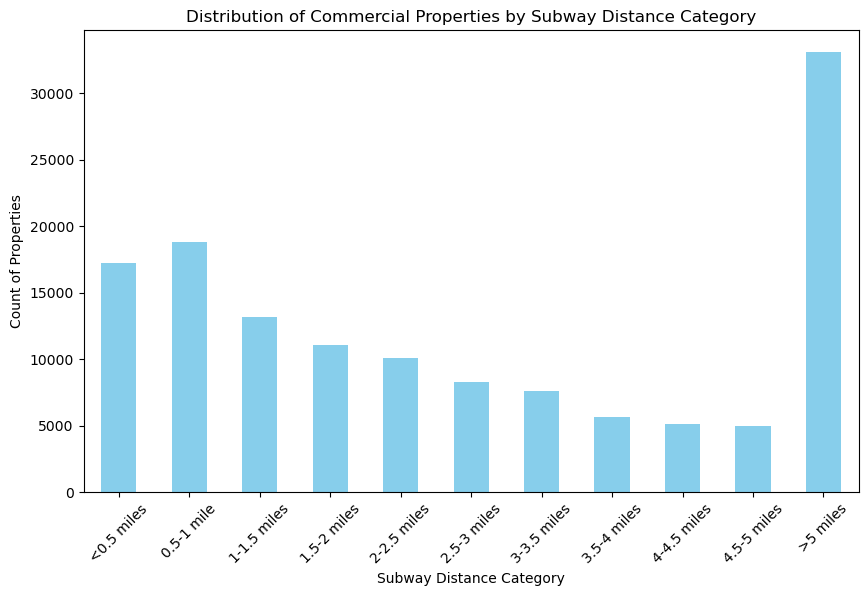

In [93]:
import matplotlib.pyplot as plt

# Define the distance categories for 0.5-mile increments up to 5 miles and beyond
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, float('inf')]
labels = ['<0.5 miles', '0.5-1 mile', '1-1.5 miles', '1.5-2 miles', '2-2.5 miles', '2.5-3 miles', 
          '3-3.5 miles', '3.5-4 miles', '4-4.5 miles', '4.5-5 miles', '>5 miles']

# Apply the bins to create the distance categories for both subway and park distances
df_commercial.loc[:, 'subway_distance_category'] = pd.cut(df_commercial['distance_to_subway'], bins=bins, labels=labels)
df_commercial.loc[:, 'park_distance_category'] = pd.cut(df_commercial['distance_to_park'], bins=bins, labels=labels)

# Display the first few rows of the categorized distances
print(df_commercial[['distance_to_subway', 'subway_distance_category', 'distance_to_park', 'park_distance_category']].head())

# Visualize the count of properties in each subway distance category
plt.figure(figsize=(10, 6))
df_commercial['subway_distance_category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Commercial Properties by Subway Distance Category')
plt.xlabel('Subway Distance Category')
plt.ylabel('Count of Properties')
plt.xticks(rotation=45)
plt.show()

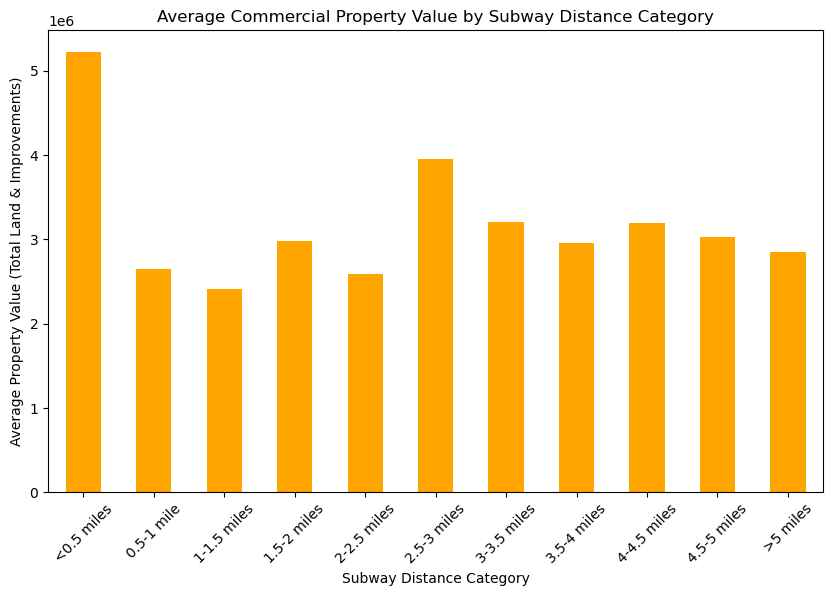

subway_distance_category
<0.5 miles     5.220760e+06
0.5-1 mile     2.647654e+06
1-1.5 miles    2.416007e+06
1.5-2 miles    2.978049e+06
2-2.5 miles    2.593930e+06
2.5-3 miles    3.958262e+06
3-3.5 miles    3.204675e+06
3.5-4 miles    2.959985e+06
4-4.5 miles    3.199198e+06
4.5-5 miles    3.025604e+06
>5 miles       2.847662e+06
Name: Roll_totLandImp, dtype: float64


In [99]:
# Use .loc[] to avoid SettingWithCopyWarning and modify the original DataFrame
df_commercial_clean = df_commercial.copy()  # Make a deep copy to avoid issues
df_commercial_clean.loc[:, 'Roll_totLandImp'] = pd.to_numeric(df_commercial_clean['Roll_totLandImp'], errors='coerce')
df_commercial_clean.loc[:, 'distance_to_subway'] = pd.to_numeric(df_commercial_clean['distance_to_subway'], errors='coerce')
df_commercial_clean.loc[:, 'distance_to_park'] = pd.to_numeric(df_commercial_clean['distance_to_park'], errors='coerce')

# Drop rows with invalid values (NaNs) after coercion
df_commercial_clean = df_commercial_clean.dropna(subset=['Roll_totLandImp', 'distance_to_subway', 'distance_to_park'])

# Group by subway distance category and calculate mean property values
avg_value_by_subway_distance = df_commercial_clean.groupby('subway_distance_category', observed=True)['Roll_totLandImp'].mean()

# Plot the average property values by subway distance category
plt.figure(figsize=(10, 6))
avg_value_by_subway_distance.plot(kind='bar', color='orange')
plt.title('Average Commercial Property Value by Subway Distance Category')
plt.xlabel('Subway Distance Category')
plt.ylabel('Average Property Value (Total Land & Improvements)')
plt.xticks(rotation=45)
plt.show()

# Display the average values
print(avg_value_by_subway_distance)


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/1511655847.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value_per_sqft_by_subway_distance = df_commercial.groupby('subway_distance_category')['value_per_sqft'].mean()


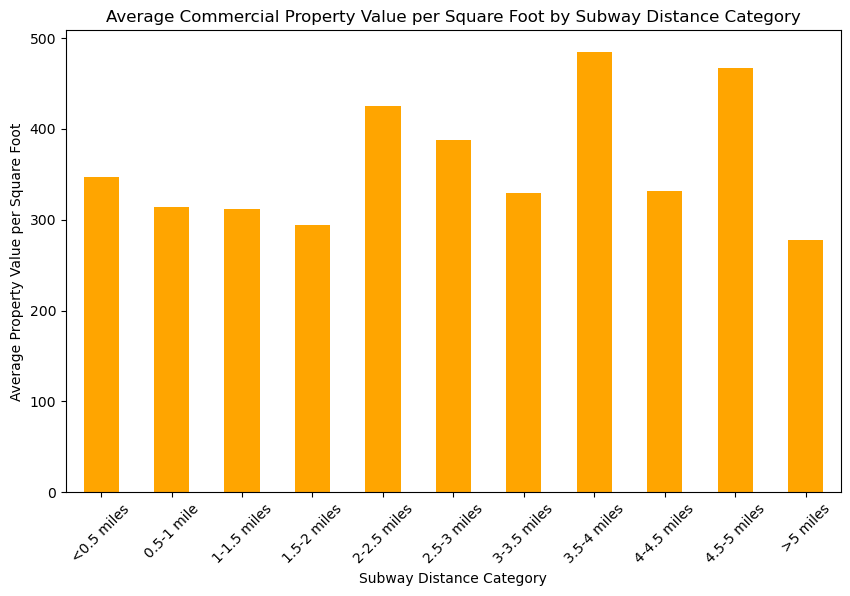

In [105]:
# Convert 'Roll_totLandImp' and 'SQFTmain' to numeric, forcing errors to NaN
df_commercial.loc[:, 'Roll_totLandImp'] = pd.to_numeric(df_commercial['Roll_totLandImp'], errors='coerce')
df_commercial.loc[:, 'SQFTmain'] = pd.to_numeric(df_commercial['SQFTmain'], errors='coerce')

# Ensure there are no zero values in the SQFTmain to avoid division by zero
df_commercial = df_commercial[df_commercial['SQFTmain'] > 0]

# Step 1: Create a new column for property value per square foot
df_commercial.loc[:, 'value_per_sqft'] = df_commercial['Roll_totLandImp'] / df_commercial['SQFTmain']

# Step 2: Group by subway distance category and calculate the average value per square foot
avg_value_per_sqft_by_subway_distance = df_commercial.groupby('subway_distance_category')['value_per_sqft'].mean()

# Step 3: Visualize the average property value per square foot by subway distance category
plt.figure(figsize=(10, 6))
avg_value_per_sqft_by_subway_distance.plot(kind='bar', color='orange')
plt.title('Average Commercial Property Value per Square Foot by Subway Distance Category')
plt.xlabel('Subway Distance Category')
plt.ylabel('Average Property Value per Square Foot')
plt.xticks(rotation=45)
plt.show()


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/3611168969.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_log_value_per_sqft_by_subway_distance = df_commercial.groupby('subway_distance_category')['log_value_per_sqft'].mean()


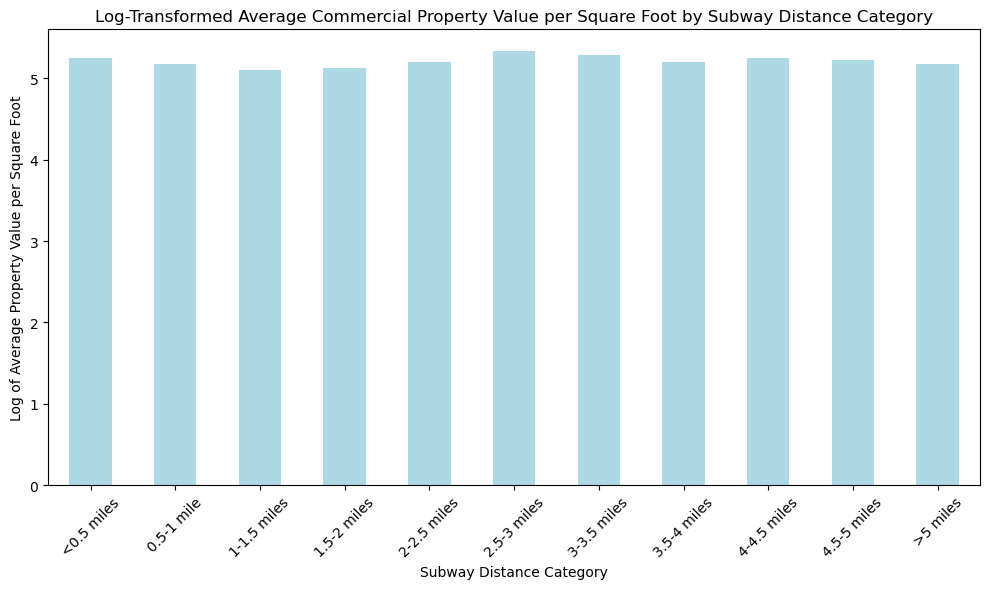

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation to 'value_per_sqft' to smooth out the distribution
df_commercial['log_value_per_sqft'] = np.log(df_commercial['value_per_sqft'].replace(0, np.nan)).dropna()

# Group by subway distance category and calculate the average log-transformed values
avg_log_value_per_sqft_by_subway_distance = df_commercial.groupby('subway_distance_category')['log_value_per_sqft'].mean()

# Plot the average log-transformed property value per square foot by subway distance
plt.figure(figsize=(10, 6))
avg_log_value_per_sqft_by_subway_distance.plot(kind='bar', color='lightblue')
plt.title('Log-Transformed Average Commercial Property Value per Square Foot by Subway Distance Category')
plt.xlabel('Subway Distance Category')
plt.ylabel('Log of Average Property Value per Square Foot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/1083559238.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value_per_sqft_by_park_distance = df_commercial.groupby('park_distance_category')['value_per_sqft'].mean()


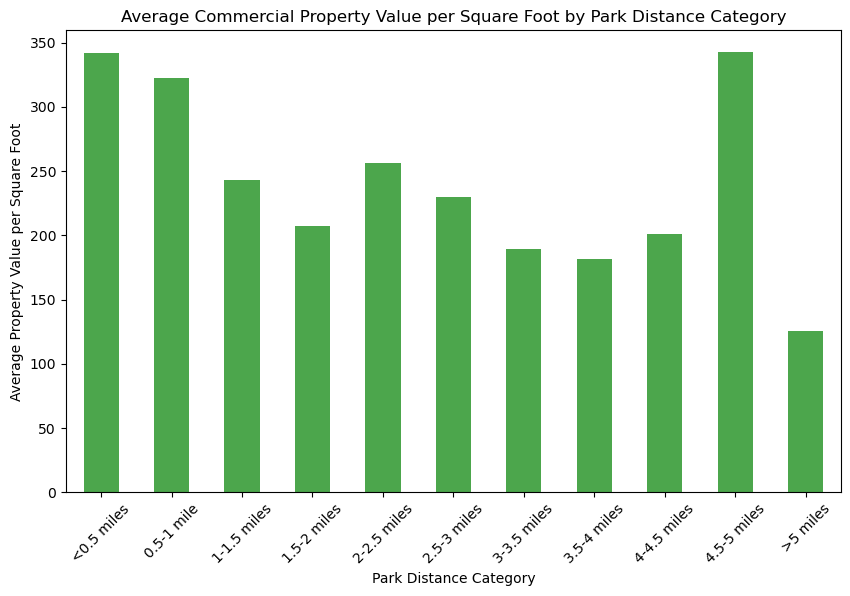

In [109]:
#Visualize by PARK DISTANCE

# Step 1: Group by park distance category and calculate the average value per square foot
avg_value_per_sqft_by_park_distance = df_commercial.groupby('park_distance_category')['value_per_sqft'].mean()

# Step 2: Plot the average value per square foot by park distance category
plt.figure(figsize=(10, 6))
avg_value_per_sqft_by_park_distance.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Commercial Property Value per Square Foot by Park Distance Category')
plt.xlabel('Park Distance Category')
plt.ylabel('Average Property Value per Square Foot')
plt.xticks(rotation=45)
plt.show()


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/3143407158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value_by_type_and_subway = df_commercial.groupby(['UseType', 'subway_distance_category'])['value_per_sqft'].mean().unstack()


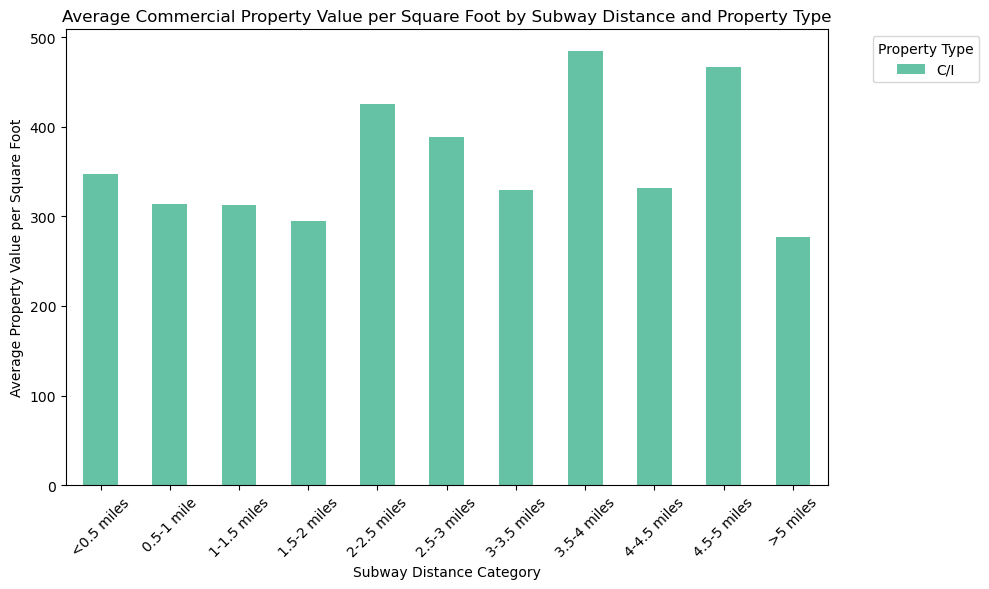

In [111]:
# Group by property type and subway distance category, and calculate the average value per square foot
avg_value_by_type_and_subway = df_commercial.groupby(['UseType', 'subway_distance_category'])['value_per_sqft'].mean().unstack()

# Plot the results
avg_value_by_type_and_subway.T.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Average Commercial Property Value per Square Foot by Subway Distance and Property Type")
plt.ylabel("Average Property Value per Square Foot")
plt.xlabel("Subway Distance Category")
plt.xticks(rotation=45)
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/3869955531.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value_by_type_and_park = df_commercial.groupby(['UseType', 'park_distance_category'])['value_per_sqft'].mean().unstack()


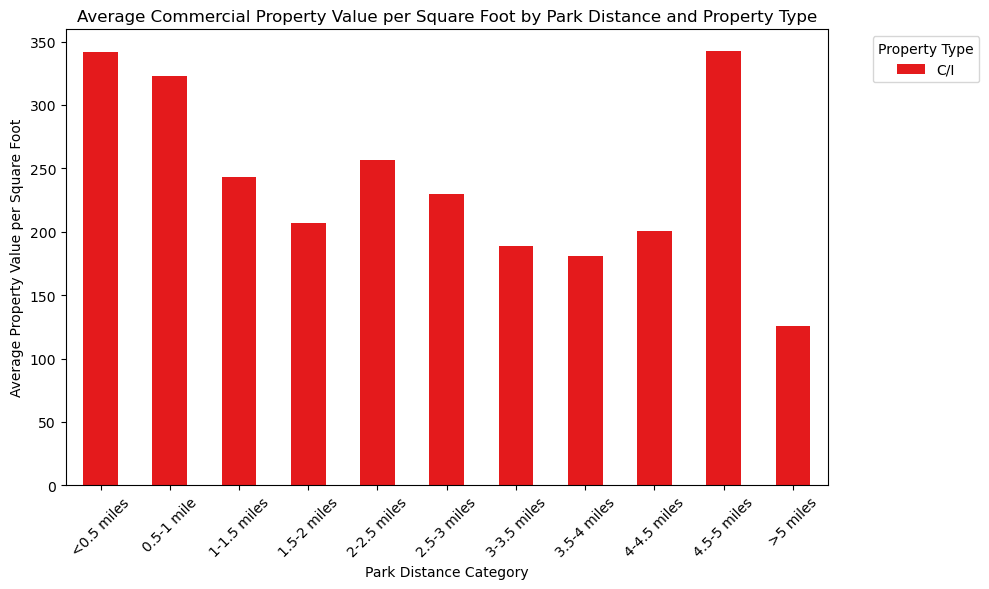

In [113]:
# Group by property type and park distance category, and calculate the average value per square foot
avg_value_by_type_and_park = df_commercial.groupby(['UseType', 'park_distance_category'])['value_per_sqft'].mean().unstack()

# Plot the results
avg_value_by_type_and_park.T.plot(kind='bar', figsize=(10,6), colormap='Set1')
plt.title("Average Commercial Property Value per Square Foot by Park Distance and Property Type")
plt.ylabel("Average Property Value per Square Foot")
plt.xlabel("Park Distance Category")
plt.xticks(rotation=45)
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [115]:
# Filter the dataset to only include properties within 10 miles of a subway or park
df_filtered = df_commercial[(df_commercial['distance_to_subway'] <= 10) & (df_commercial['distance_to_park'] <= 10)]

# Verify the filtering
print(f"Number of properties within 10 miles of subway and park: {df_filtered.shape[0]}")


Number of properties within 10 miles of subway and park: 103370


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/177707093.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value_by_type_and_subway = df_filtered.groupby(['UseType', 'subway_distance_category'])['value_per_sqft'].mean().unstack()


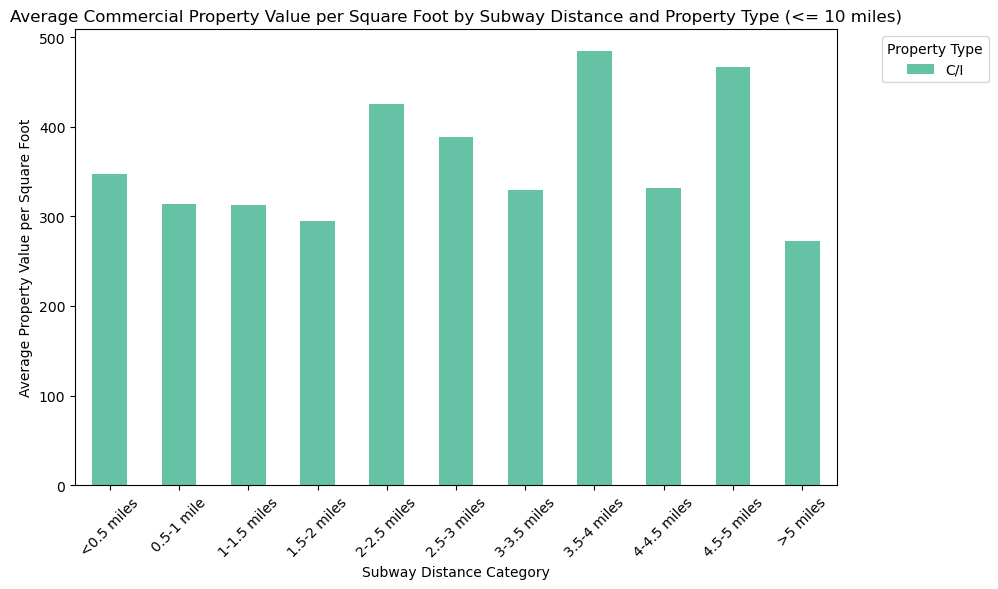

In [117]:
# Group by property type and subway distance category for properties within 10 miles
avg_value_by_type_and_subway = df_filtered.groupby(['UseType', 'subway_distance_category'])['value_per_sqft'].mean().unstack()

# Plot the results for subway proximity
avg_value_by_type_and_subway.T.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Average Commercial Property Value per Square Foot by Subway Distance and Property Type (<= 10 miles)")
plt.ylabel("Average Property Value per Square Foot")
plt.xlabel("Subway Distance Category")
plt.xticks(rotation=45)
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_3026/409316401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value_by_type_and_park = df_filtered.groupby(['UseType', 'park_distance_category'])['value_per_sqft'].mean().unstack()


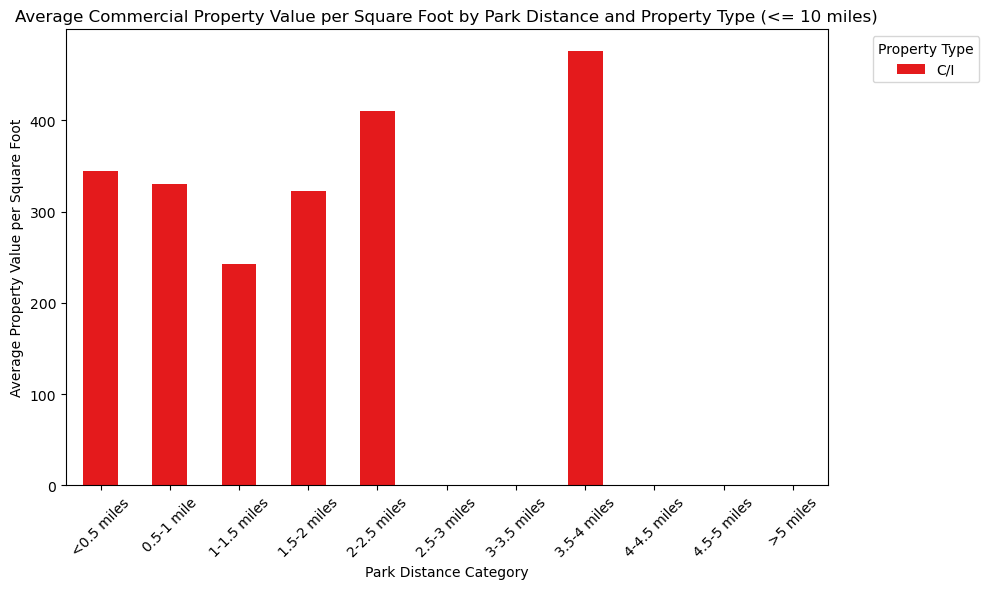

In [121]:
# Group by property type and park distance category for properties within 10 miles
avg_value_by_type_and_park = df_filtered.groupby(['UseType', 'park_distance_category'])['value_per_sqft'].mean().unstack()

# Plot the results for park proximity
avg_value_by_type_and_park.T.plot(kind='bar', figsize=(10,6), colormap='Set1')
plt.title("Average Commercial Property Value per Square Foot by Park Distance and Property Type (<= 10 miles)")
plt.ylabel("Average Property Value per Square Foot")
plt.xlabel("Park Distance Category")
plt.xticks(rotation=45)
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Load a sample of the dataset
# Load the dataset
file_path = 'Assessor_Parcel_Data_2006_Present.csv'
df_property = pd.read_csv(file_path, encoding='ISO-8859-1', sep='\t', on_bad_lines='skip', dtype=str)

# Corrected filtering step using square brackets
df_residential = df_property[df_property['UseType'] == 'SFR']

# Check if there are multiple years in the sample
years_available = df_residential['RollYear'].unique()

print("Years available in the dataset:", years_available)


# Take a random sample of the residential data to work with (say, 10,000 rows)
df_sample = df_residential.sample(n=10000, random_state=42)

# Display the first few rows of the sample to verify
df_sample.head()


Years available in the dataset: ['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


,SitusZIP,TaxRateArea_CITY,AIN,RollYear,TaxRateArea,AssessorID,PropertyLocation,UseType,UseCode,UseCodeDescChar1,...,SitusHouseNo,SitusFraction,SitusDirection,SitusStreet,SitusUnit,SitusCity,SitusZIP5,rowID,CENTER_LAT,CENTER_LON
10045535,93536-4641,LANCASTER,3112017036,2014,05494,3112-017-036,43015 AMOY ST LANCASTER CA 93536,SFR,0100,Residential,...,43015,,,AMOY ST,,LANCASTER CA,93536,20143112017036,34.66442373,-118.17401906
42573047,91789-3304,DIAMOND BAR,8719016032,2008,04954,8719-016-032,21227 FIBRE CT DIAMOND BAR CA 91789,SFR,0100,Residential,...,21227,,,FIBRE CT,,DIAMOND BAR CA,91789,20088719016032,34.00629726,-117.84162102
15042528,90291-2640,LOS ANGELES,4240007027,2011,00067,4240-007-027,217 5TH AVE LOS ANGELES CA 90291,SFR,0100,Residential,...,217,,,5TH AVE,,LOS ANGELES CA,90291,20114240007027,33.99893543,-118.47563753
26169579,91001-1919,unincorporated,5841013035,2010,07688,5841-013-035,523 E POPPYFIELDS DR ALTADENA CA 91001,SFR,0100,Residential,...,523,,E,POPPYFIELDS DR,,ALTADENA CA,91001,20105841013035,34.19546899,-118.13525844
1216228,91335-6225,LOS ANGELES,2123015005,2010,00016,2123-015-005,6411 HESPERIA AVE LOS ANGELES CA 91335,SFR,0100,Residential,...,6411,,,HESPERIA AVE,,LOS ANGELES CA,91335,20102123015005,34.18729330,-118.52582509
